In [25]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg
EPSILON = 1.1920929e-07
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
import scanpy as sc
import pandas as pd
import spatialdm as sdm
import squidpy as sq
import tqdm
import adjustText
from scipy.optimize import minimize, minimize_scalar
from sklearn.neighbors import NearestNeighbors
import importlib

In [3]:
import warnings
import networkx as nx

# Silencing FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
import sys
sys.path.append("/Users/hs0424/Workspace/copulacci/src/copulacci/")
import cci
import spatial
import model
import simulation

/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adata = sc.read_h5ad('data/human_breast_visium/adata.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 3798 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'old_annot_type', 'old_fine_annot_type', '1', '2', '3', '4', '5', 'scaled_x', 'scaled_y', 'fine_annot', 'annot', 'fine_annot_type', 'ground_truth', 'annot_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

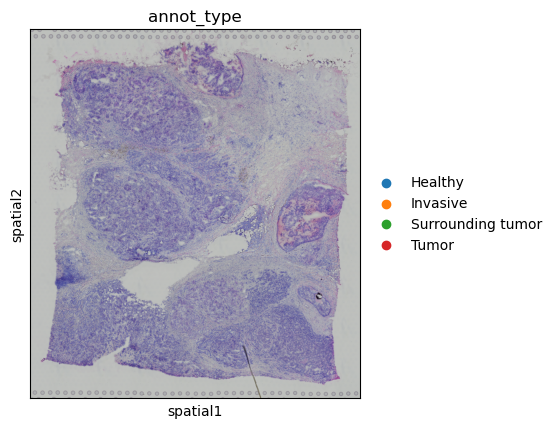

In [398]:
sc.pl.spatial(adata,  color='annot_type',spot_size=3)

In [8]:
sdm.extract_lr(adata, 'human', min_cell=20)

In [9]:
adata_sdm = adata.copy()

In [10]:
adata.obs['celltype'] = adata.obs.annot_type

In [14]:
adata_sdm = adata.copy()

In [51]:
importlib.reload(spatial)

<module 'spatial' from '/Users/hs0424/Workspace/copulacci/src/copulacci/spatial.py'>

In [52]:
int_edges_new, int_edges_with_selfloop = spatial.construct_boundary(
    adata
)

relabeling nodes


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3798/3798 [00:00<00:00, 5491.33it/s]


In [53]:
df_lig_rec_linear = cci.extract_lig_rec_from_sdm(adata, allow_same_lr=True)
chosen_lr = list(set( df_lig_rec_linear.ligand.unique()).union(
    set( df_lig_rec_linear.receptor.unique() )
))
count_df = adata.raw.to_adata().to_df().loc[:,chosen_lr]

In [54]:
lig_list = adata.uns['ligand'].values
rec_list = adata.uns['receptor'].values

In [60]:
df_lig_rec = pd.concat(
   [ adata.uns['ligand'], adata.uns['receptor']],
    axis = 1
)

In [55]:
int_edges_with_selfloop.shape

(20280, 7)

In [56]:
int_edges_new.shape

(16482, 7)

In [57]:
20280 - 16482

3798

In [43]:
20280 - 19216

1064

In [58]:
data_list_dict, umi_sums, dist_list_dict = spatial.prepare_data_list(
    count_df,
    int_edges_with_selfloop,
    heteromeric=True,
    lig_list=lig_list,
    rec_list = rec_list,
    summarization='sum'
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:17<00:00,  1.06s/it]


In [63]:
importlib.reload(model)

<module 'model' from '/Users/hs0424/Workspace/copulacci/src/copulacci/model.py'>

In [64]:
cop_df = model.run_copula(
    data_list_dict,
    umi_sums,
    DT=False,
    cutoff = 0.8,
    type_run='dense',
    num_restarts=2,
    df_lig_rec=df_lig_rec,
    heteronomic=True
)

Surrounding tumor=Surrounding tumor


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    7.0s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    9.9s
[Parallel(n_jobs=20)]: Done 470 tasks      | elapsed:   20.6s
[Paralle

Invasive=Invasive


[Parallel(n_jobs=20)]: Done 320 tasks      | elapsed:   28.9s
[Parallel(n_jobs=20)]: Done 570 tasks      | elapsed:  1.1min
[Parallel(n_jobs=20)]: Done 971 tasks      | elapsed:  1.5min
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:  1.7min remaining:    3.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:  1.8min finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
/Users/hs0424/miniforge3/envs/py3

Healthy=Healthy


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/hs0424/miniforge3/env

Tumor=Tumor


[Parallel(n_jobs=20)]: Done 401 tasks      | elapsed:   10.0s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 690 tasks      | elapsed:   17.6s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   26.0s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Invasive


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    5.4s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 860 tasks      | elapsed:    8.5s
/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   11.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent worker

Invasive=Surrounding tumor


[Parallel(n_jobs=20)]: Done 401 tasks      | elapsed:    5.0s
[Parallel(n_jobs=20)]: Done 697 tasks      | elapsed:    8.6s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   12.4s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Invasive


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    7.2s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Tumor


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    3.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    7.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Surrounding tumor


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    4.7s
[Parallel(n_jobs=20)]: Done 834 tasks      | elapsed:    7.6s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   10.7s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Tumor


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    4.1s
[Parallel(n_jobs=20)]: Done 860 tasks      | elapsed:    6.7s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    9.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Surrounding tumor


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    3.5s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    4.7s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Surrounding tumor=Healthy


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.1s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Invasive


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 1222 tasks      | elapsed:    5.2s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    5.4s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    5.6s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Invasive=Healthy


[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    4.3s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.3s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Tumor=Healthy


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    3.2s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    7.1s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    7.5s finished
[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Healthy=Tumor


[Parallel(n_jobs=20)]: Done 440 tasks      | elapsed:    3.1s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.7s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    7.1s finished


In [65]:
cop_df_dict = cop_df

In [77]:
cop_df_dict = model.run_scc(
    count_df,
    None,
    cop_df_dict,
    int_edges_with_selfloop,
    groups = list(data_list_dict.keys()),
    heteronomic=True,
    lig_list=lig_list,
    rec_list = rec_list,
    summarization = "sum"
)

Surrounding tumor=Surrounding tumor
Graph with 823 nodes and 1768 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    8.9s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:   10.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:   11.4s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:   13.6s
[Parallel(n_jobs=20)]: Done 1210 tasks      | elapsed:   16.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   17.0s finished


Invasive=Invasive
Graph with 2027 nodes and 6418 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    5.3s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:   15.2s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:   24.7s remaining:    0.8s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:   25.4s finished


Healthy=Healthy
Graph with 485 nodes and 1438 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered in scalar divide
  SCC = (N/W) * (cv/v) / 2.0
/Users/hs0424/Workspace/copulacci/src/copulacci/model.py:1659: RuntimeWarning: invalid value encountered i

Tumor=Tumor
Graph with 463 nodes and 1307 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    1.5s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    4.0s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.5s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.7s finished


Surrounding tumor=Invasive
DiGraph with 610 nodes and 615 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    3.9s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.4s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.6s finished


Invasive=Surrounding tumor
DiGraph with 610 nodes and 615 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:    3.9s
[Parallel(n_jobs=20)]: Done 1276 out of 1315 | elapsed:    6.3s remaining:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    6.5s finished


Tumor=Invasive
DiGraph with 34 nodes and 27 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Invasive=Tumor
DiGraph with 34 nodes and 27 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Tumor=Surrounding tumor
DiGraph with 244 nodes and 234 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.8s finished


Surrounding tumor=Tumor
DiGraph with 244 nodes and 234 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.9s finished


Healthy=Surrounding tumor
DiGraph with 170 nodes and 154 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.5s finished


Surrounding tumor=Healthy
DiGraph with 170 nodes and 154 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.5s finished


Healthy=Invasive
DiGraph with 60 nodes and 55 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.2s finished


Invasive=Healthy
DiGraph with 60 nodes and 55 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.2s finished


Tumor=Healthy
DiGraph with 26 nodes and 23 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


Healthy=Tumor
DiGraph with 26 nodes and 23 edges


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 600 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 1315 out of 1315 | elapsed:    0.1s finished


In [91]:
sdm_df_dict = model.run_sdm(
    adata,
    int_edges_with_selfloop,
    groups = list(cop_df_dict.keys()),
    nproc = 20,
    heteronomic=True
)

Surrounding tumor=Surrounding tumor
Graph with 823 nodes and 1768 edges
(823, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Surrounding tumor  is  67.93068313598633  seconds
Invasive=Invasive
Graph with 2027 nodes and 6418 edges
(2027, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Invasive  is  192.5545530319214  seconds
Healthy=Healthy
Graph with 485 nodes and 1438 edges
(485, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Healthy  is  32.36392402648926  seconds
Tumor=Tumor
Graph with 463 nodes and 1307 edges
(463, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Tumor  is  54.35200476646423  seconds
Surrounding tumor=Invasive
DiGraph with 610 nodes and 615 edges
(610, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Invasive  is  59.44684290885925  seconds
Invasive=Surrounding tumor
DiGraph with 610 nodes and 615 edges
(610, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Surrounding tumor  is  59.96675896644592  seconds
Tumor=Invasive
DiGraph with 34 nodes and 27 edges
(34, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Invasive  is  18.538609981536865  seconds
Invasive=Tumor
DiGraph with 34 nodes and 27 edges
(34, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Tumor  is  18.084184169769287  seconds
Tumor=Surrounding tumor
DiGraph with 244 nodes and 234 edges
(244, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Surrounding tumor  is  33.97897386550903  seconds
Surrounding tumor=Tumor
DiGraph with 244 nodes and 234 edges
(244, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Tumor  is  33.323216915130615  seconds
Healthy=Surrounding tumor
DiGraph with 170 nodes and 154 edges
(170, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Surrounding tumor  is  22.63947606086731  seconds
Surrounding tumor=Healthy
DiGraph with 170 nodes and 154 edges
(170, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Surrounding tumor=Healthy  is  23.221077919006348  seconds
Healthy=Invasive
DiGraph with 60 nodes and 55 edges
(60, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Invasive  is  18.74848508834839  seconds
Invasive=Healthy
DiGraph with 60 nodes and 55 edges
(60, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Invasive=Healthy  is  19.44288921356201  seconds
Tumor=Healthy
DiGraph with 26 nodes and 23 edges
(26, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Tumor=Healthy  is  17.691850185394287  seconds
Healthy=Tumor
DiGraph with 26 nodes and 23 edges
(26, 36601)


/Users/hs0424/miniforge3/envs/py390/lib/python3.9/site-packages/spatialdm/utils.py:235: RuntimeWarning: invalid value encountered in divide
  X = X/X.max()


time taken for  Healthy=Tumor  is  17.25161600112915  seconds


In [98]:
merged_res = {}
for gpair in cop_df_dict.keys():
    tmp1 = sdm_df_dict[gpair].copy()
    tmp2 = cop_df_dict[gpair]
    merged_res[gpair] = tmp1.join(tmp2, how = 'inner').copy()

In [99]:
tmp =merged_res['Surrounding tumor=Surrounding tumor'].copy()

In [106]:
tmp = tmp.loc[tmp.index.str.split('_').str[0] != tmp.index.str.split('_').str[1]]

<Axes: >

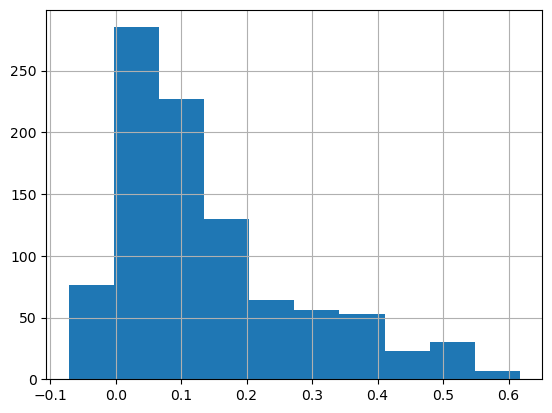

In [113]:
tmp['global_I'].hist()

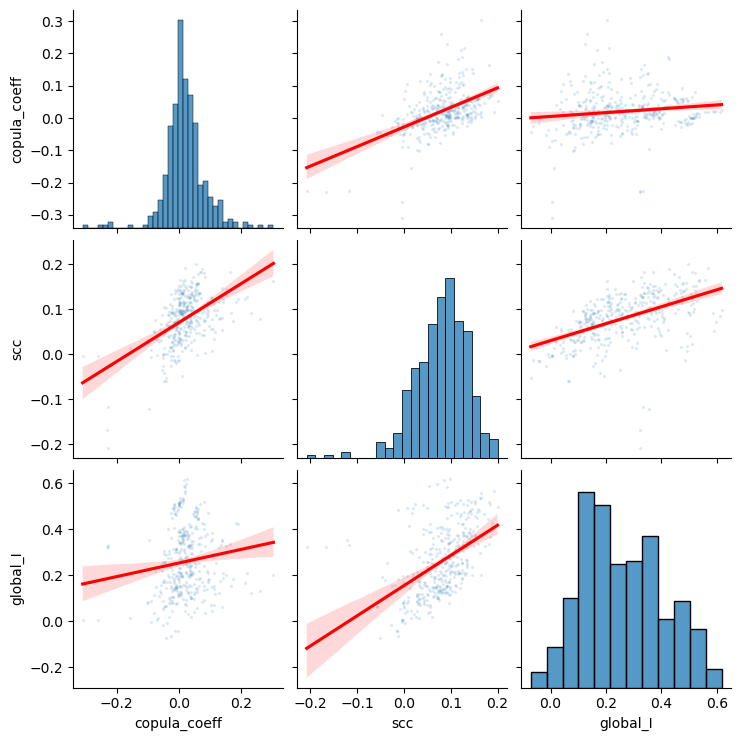

In [107]:
sns.pairplot(
    tmp.loc[tmp.copula_method == 'copula', ['copula_coeff','scc','global_I']],
    kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s':2,
                                                                      'alpha': 0.1}}
)

In [154]:
int_edges_new.loc[int_edges_new.boundary_type != 'Internal']

cell1               cell2          celltype1  \
14266  AAACCTCATGAAGTTG-1  CCAGCTGATGGTACTT-1  Surrounding tumor   
14267  CCAGCTGATGGTACTT-1  AAACCTCATGAAGTTG-1           Invasive   
14268  AAACCTCATGAAGTTG-1  TATAGGGTACTCATGA-1  Surrounding tumor   
14269  TATAGGGTACTCATGA-1  AAACCTCATGAAGTTG-1           Invasive   
14270  AAACGGTTGCGAACTG-1  ACCTACTATAAATCTA-1  Surrounding tumor   
...                   ...                 ...                ...   
16477  TTCCGGTTACCCACTT-1  TTAGAGTTTAGAAGGA-1           Invasive   
16478  TTATCCGGGATCTATA-1  TTCCTCGGACTAACCA-1           Invasive   
16479  TTCCTCGGACTAACCA-1  TTATCCGGGATCTATA-1  Surrounding tumor   
16480  TTCCGGTATCTGTGTC-1  TTCGCTAGGAAGTTGT-1              Tumor   
16481  TTCGCTAGGAAGTTGT-1  TTCCGGTATCTGTGTC-1  Surrounding tumor   

               celltype2  distance boundary_type                 interaction  
14266           Invasive       1.0      External  Surrounding tumor=Invasive  
14267  Surrounding tumor       1.0      External  Invasive=Surrounding tumor  
14268           Invasive       1.0      External  Surrounding tumor=Invasive  
14269  Surrounding tumor       1.0      External  Invasive=Surrounding tumor  
14270           Invasive       1.0      External  Surrounding tumor=Invasive  
...                  ...       ...           ...                         ...  
16477  Surrounding tumor       1.0      External  Invasive=Surrounding tumor  
16478  Surrounding tumor       1.0      External  Invasive=Surrounding tumor  
16479           Invasive       1.0      External  Surrounding tumor=Invasive  
16480  Surrounding tumor       1.0      External     Tumor=Surrounding tumor  
16481              Tumor       1.0      External     Surrounding tumor=Tumor  

[2216 rows x 7 columns]

In [118]:
internal_edges = int_edges_new.loc[int_edges_new.boundary_type == 'Internal'].interaction.unique()

In [114]:
merged_res.keys()

dict_keys(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive', 'Healthy=Healthy', 'Tumor=Tumor', 'Surrounding tumor=Invasive', 'Invasive=Surrounding tumor', 'Tumor=Invasive', 'Invasive=Tumor', 'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor', 'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy', 'Healthy=Invasive', 'Invasive=Healthy', 'Tumor=Healthy', 'Healthy=Tumor'])

In [128]:
from adjustText import adjust_text

In [124]:
import itertools
score_pair = list(itertools.combinations(['copula_coeff', 'scc','global_I'],2))

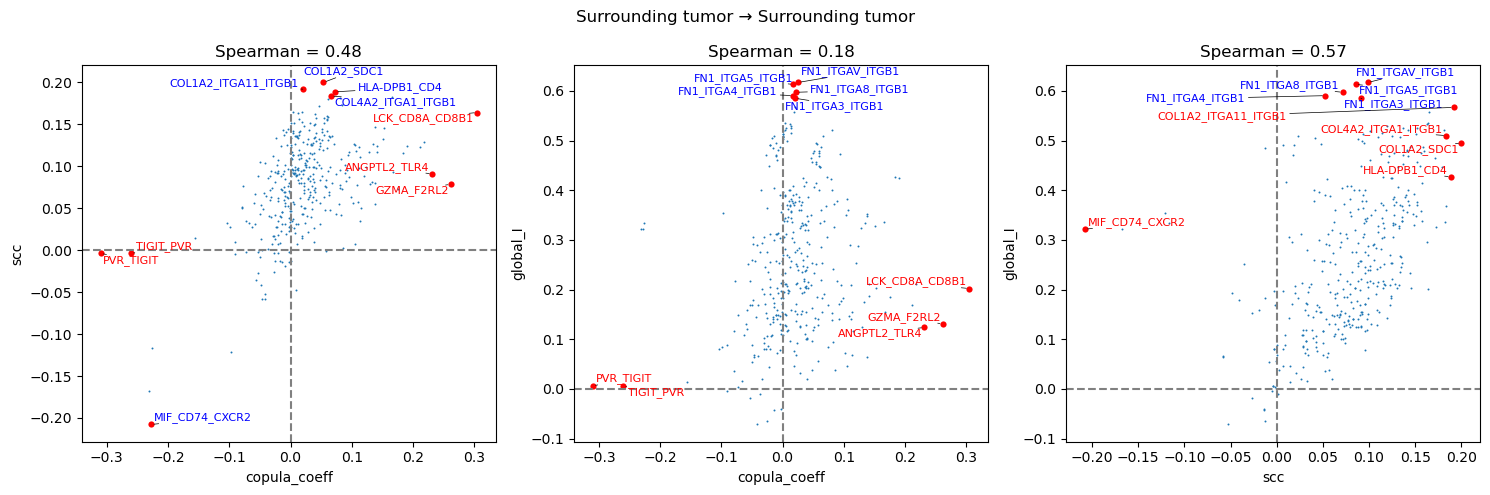

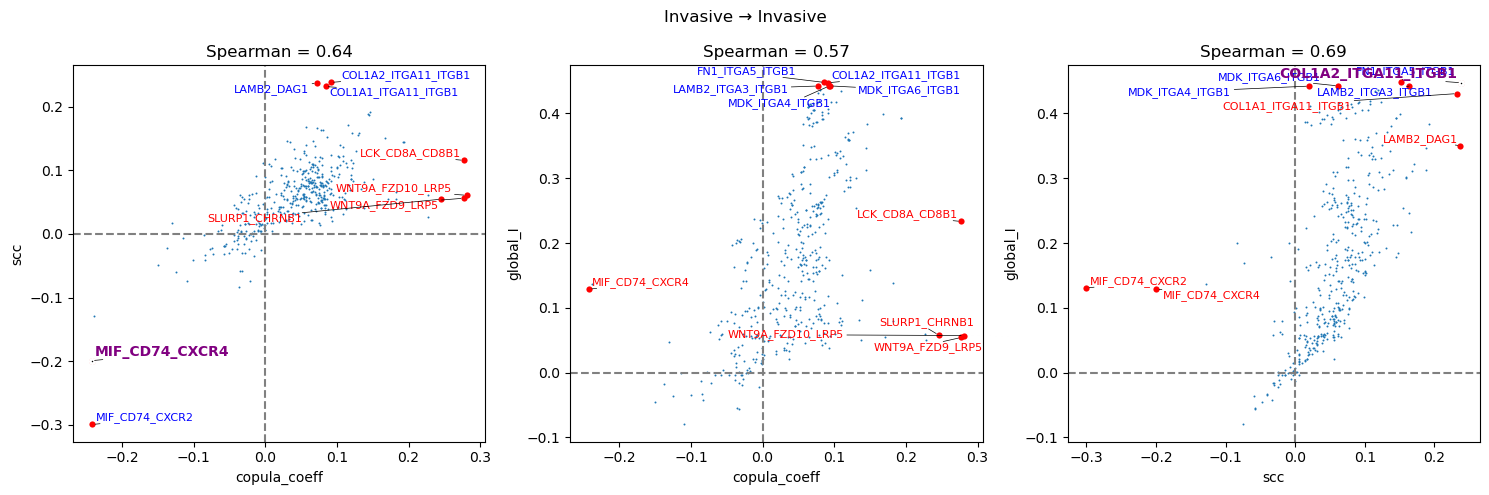

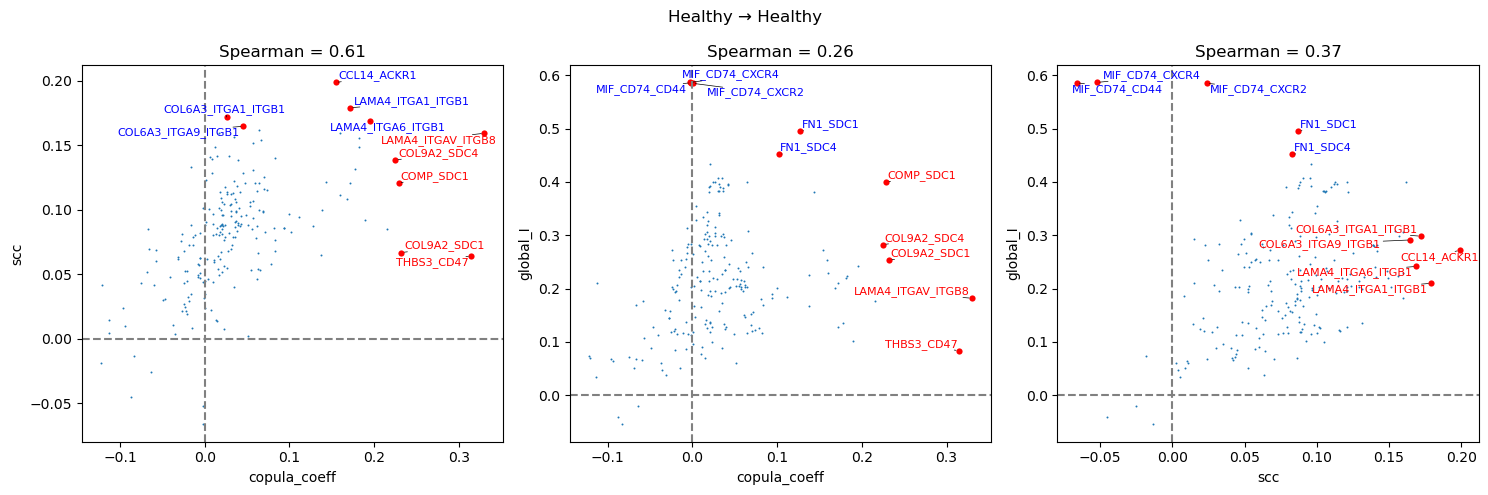

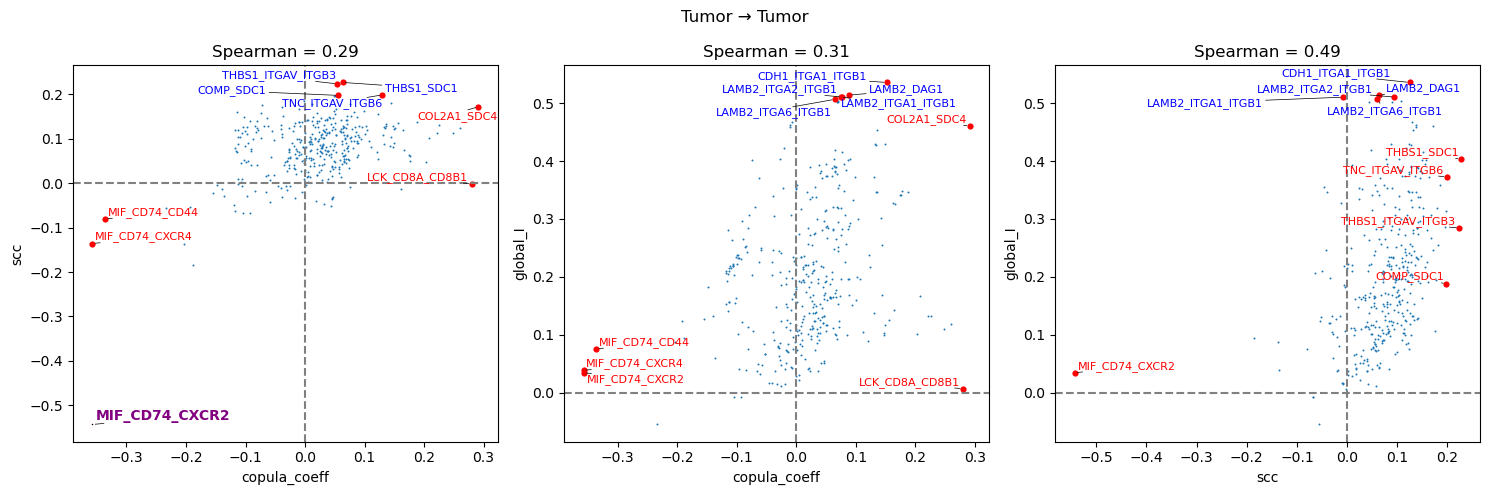

In [169]:
ntop = 5
for gpair in internal_edges:
    res = merged_res[gpair].copy()
    #res = res.drop_duplicates(['ligand', 'receptor'])
    # only take non sparse entries
    
    res = res.loc[res.copula_method == 'copula'].fillna(0)
    res = res.loc[res.index.str.split('_').str[0] != res.index.str.split('_').str[1]]
    ncol = len(score_pair)
    _, ax = plt.subplots(1,ncol, figsize=(5*ncol,5))
    for i,(x_col, y_col) in enumerate(score_pair):
        
        sig1 = res.sort_values(by=x_col, key=lambda x: abs(x), ascending=False)[:ntop]
        sig2 = res.sort_values(by=y_col, key=lambda x: abs(x), ascending=False)[:ntop]

        sig12 = sig1.join(sig2, rsuffix='_2',how='inner')
        
        sns.scatterplot(data = res, 
                        x = x_col, 
                        y = y_col, s = 2, linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig1, 
                x = x_col, 
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig2, 
                x = x_col,
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])

        text_sig = []
        for j,r in sig1.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(1, 0, 0),
                                        fontsize = 8
                                    ))
        
        for j,r in sig2.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(0, 0, 1),
                                        fontsize = 8
                                    ))
        
        if(len(text_sig) > 0):
            adjust_text(text_sig,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        
        if (len(sig12) > 0):
            sns.scatterplot(data = sig12, 
                                x = x_col, y = y_col, s = 10, c='black', linewidth = 2,
                                ax = ax[i])
            text_sig12 = []
            for j,r in sig12.iterrows():
                text_sig12.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                            s = j,
                                            color = (0.5, 0, 0.5),
                                            fontsize = 10,
                                            weight='bold'
                                        ))
            adjust_text(text_sig12,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        ax[i].set_title(f'Spearman = { stats.spearmanr(res[x_col].values, res[y_col].values)[0] :.2f}')
        ax[i].axhline(0, color='grey', linestyle='--')
        ax[i].axvline(0, color='grey', linestyle='--')
        
    
    plt.suptitle(gpair.replace('=',' → '))
    plt.tight_layout()
    plt.show()

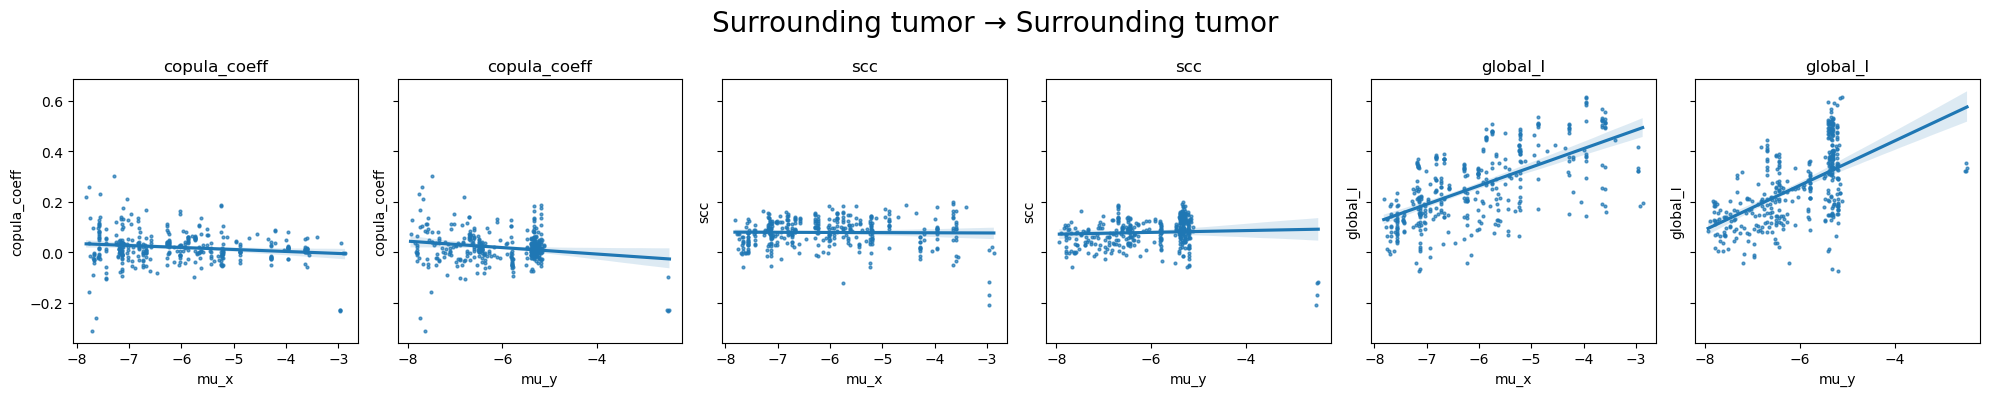

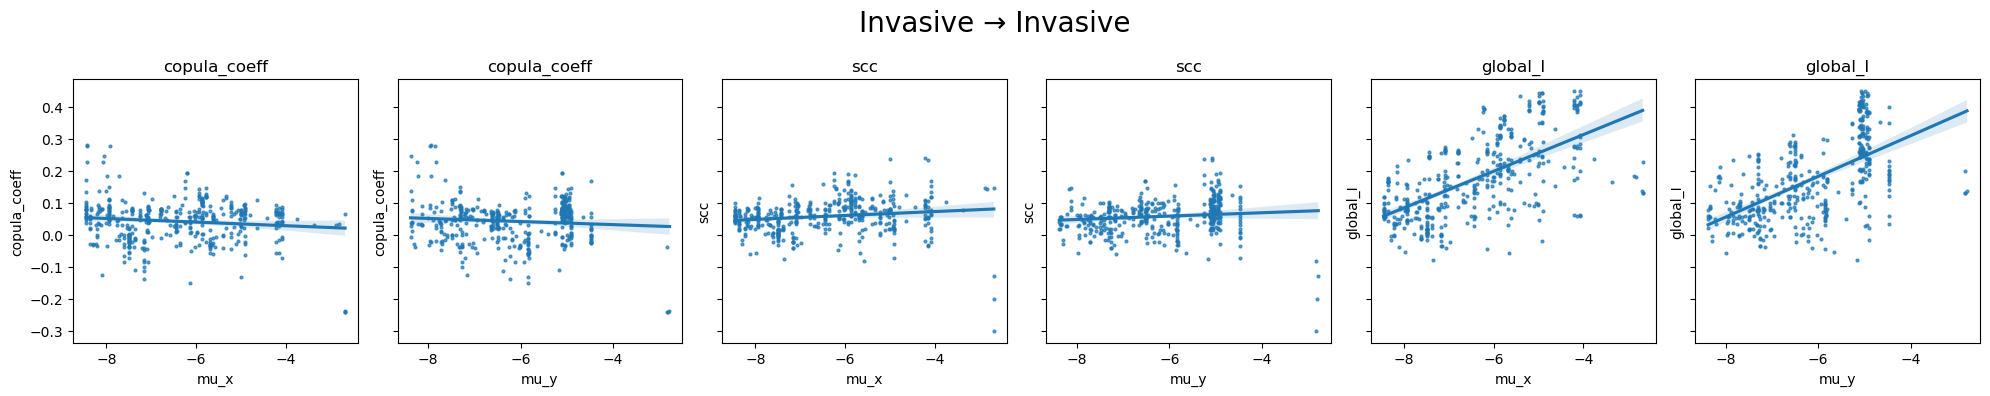

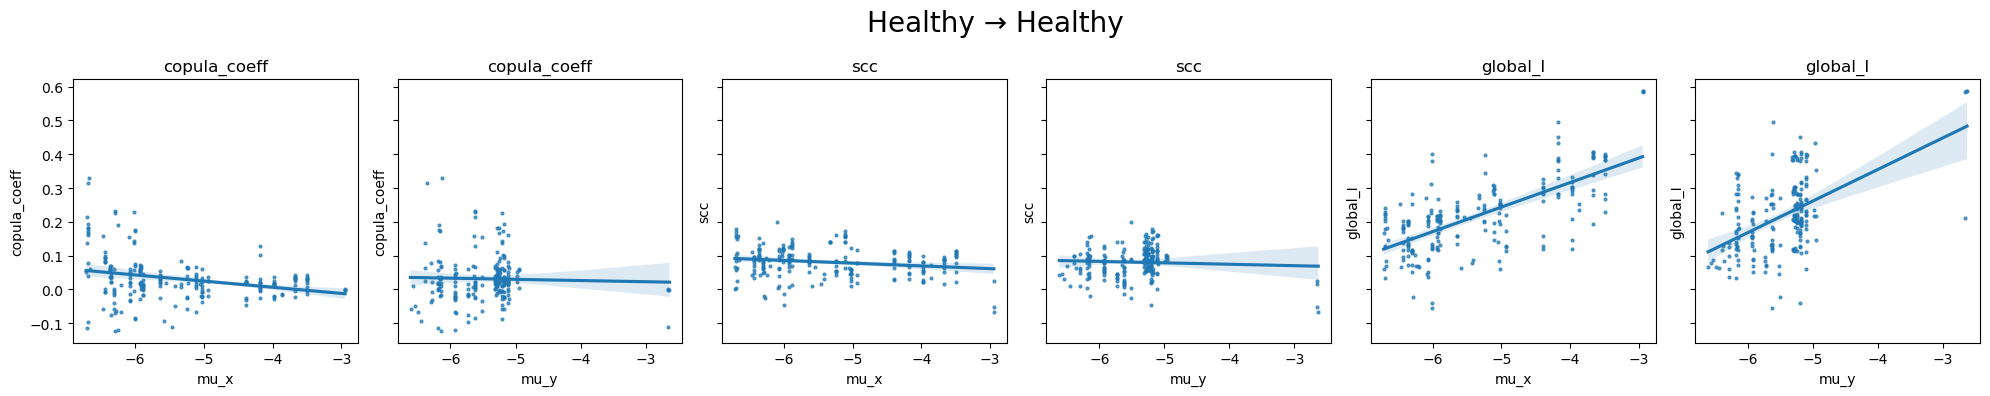

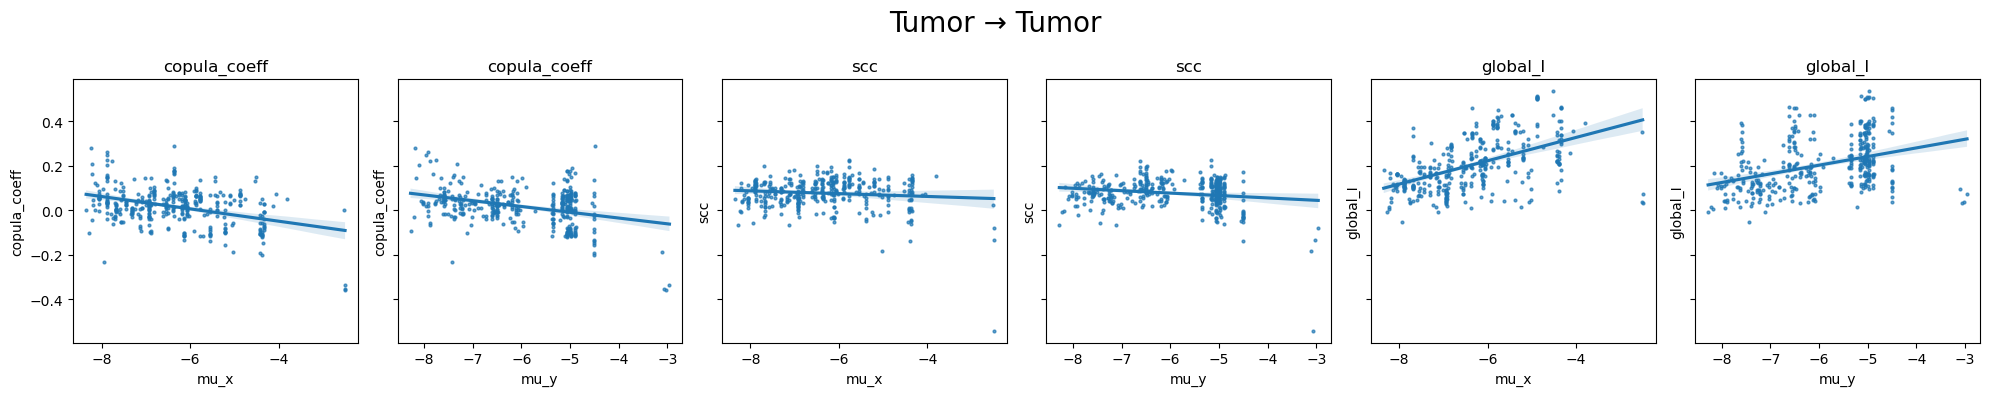

In [163]:
#_, axes = plt.subplots(4, 6, figsize=(18,3*4),sharey=True)
for j, gpair in enumerate(internal_edges):
    g11,g12 = gpair.split('=')
    row_idx = 0
    #ax = axes[j,:]
    _, ax = plt.subplots(1, 6, figsize=(20,4),sharey = True)
    tmp = merged_res[gpair].copy()
    tmp = tmp.loc[tmp.copula_method == 'copula']
    tmp = tmp.loc[tmp.index.str.split('_').str[0] != tmp.index.str.split('_').str[1]]
    
    mu_x = tmp['mu_x']
    mu_y = tmp['mu_y']
    min_val = min(mu_x.min(), mu_y.min()) - 0.2
    max_val = max(mu_x.max(), mu_y.max()) + 0.2
    

    abline = np.linspace(min_val, max_val, 100)
    for i,ycol in enumerate(['copula_coeff', 'scc', 'global_I']): 
        
        sns.regplot(x='mu_x', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i])
        sns.regplot(x='mu_y', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i+1])
        
        
        # Remove the legend and add a colorba
        ax[2*i].set_title(ycol)
        ax[2*i+1].set_title(ycol)
        
    plt.suptitle(gpair.replace('=',' → '),fontsize=20)
    plt.tight_layout()
plt.show()

In [167]:
external_edges = int_edges_new.loc[int_edges_new.boundary_type == 'External'].interaction.unique()

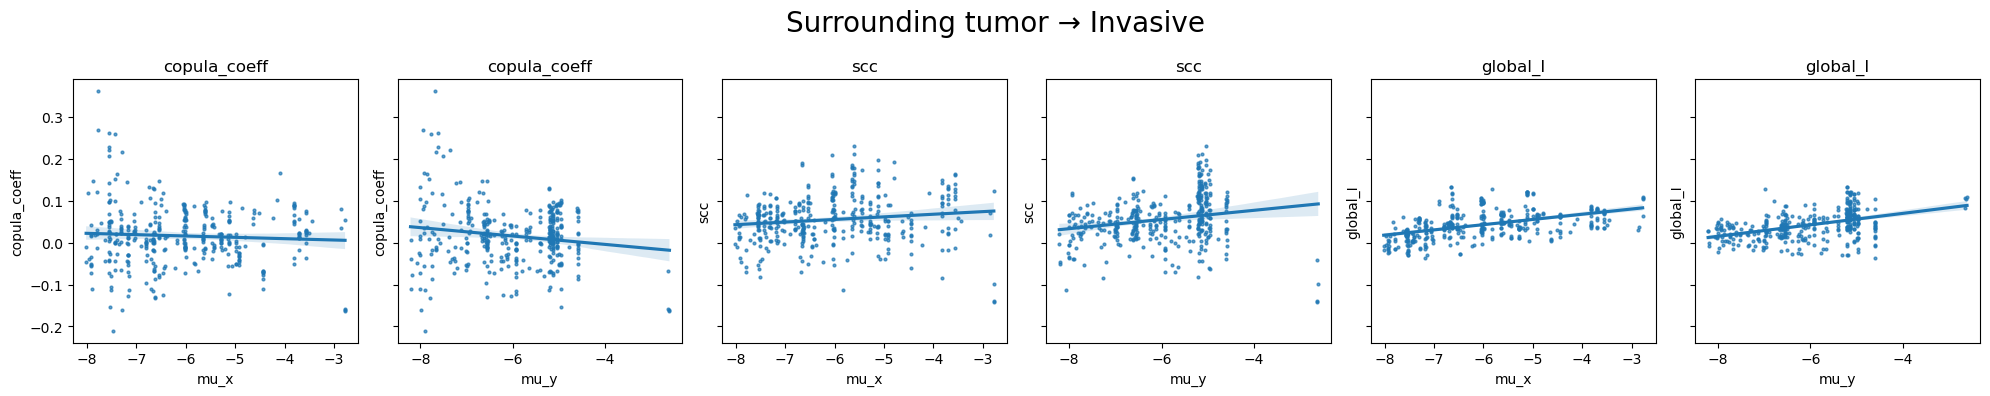

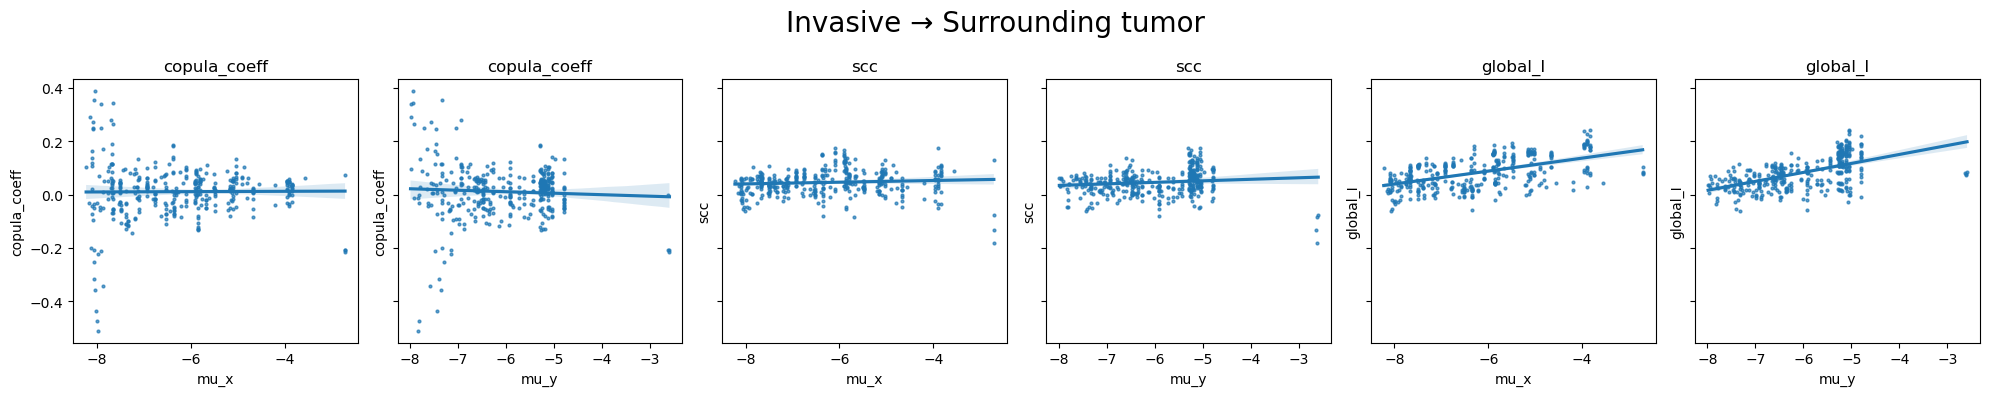

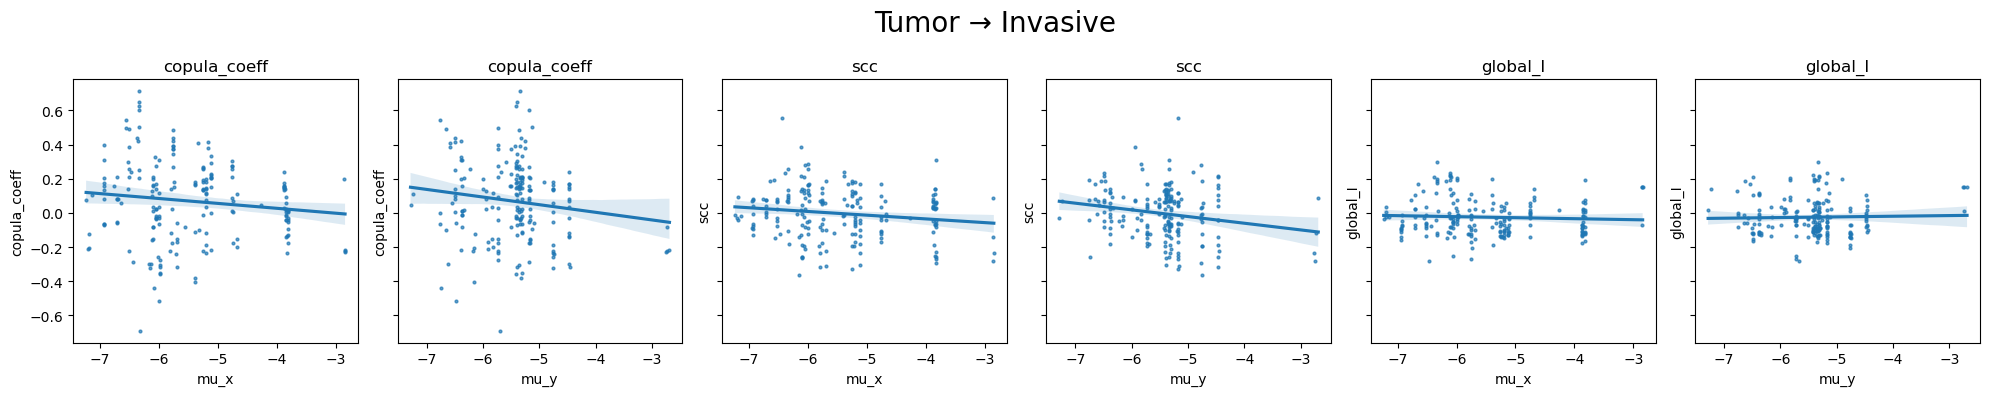

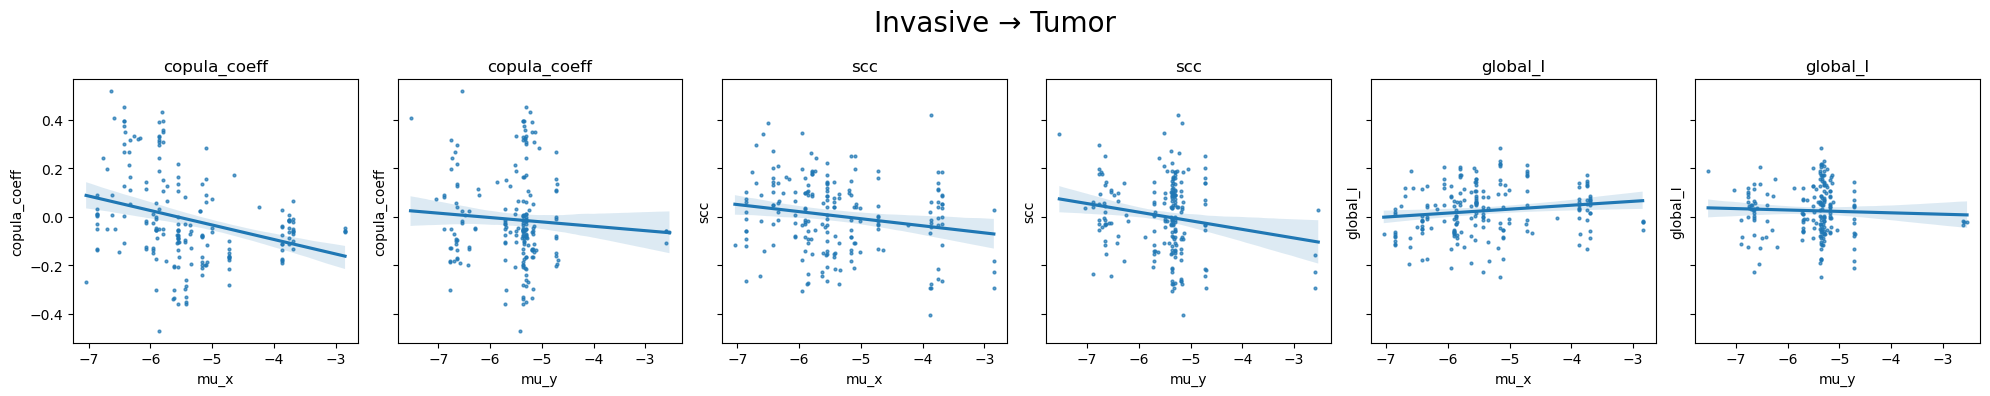

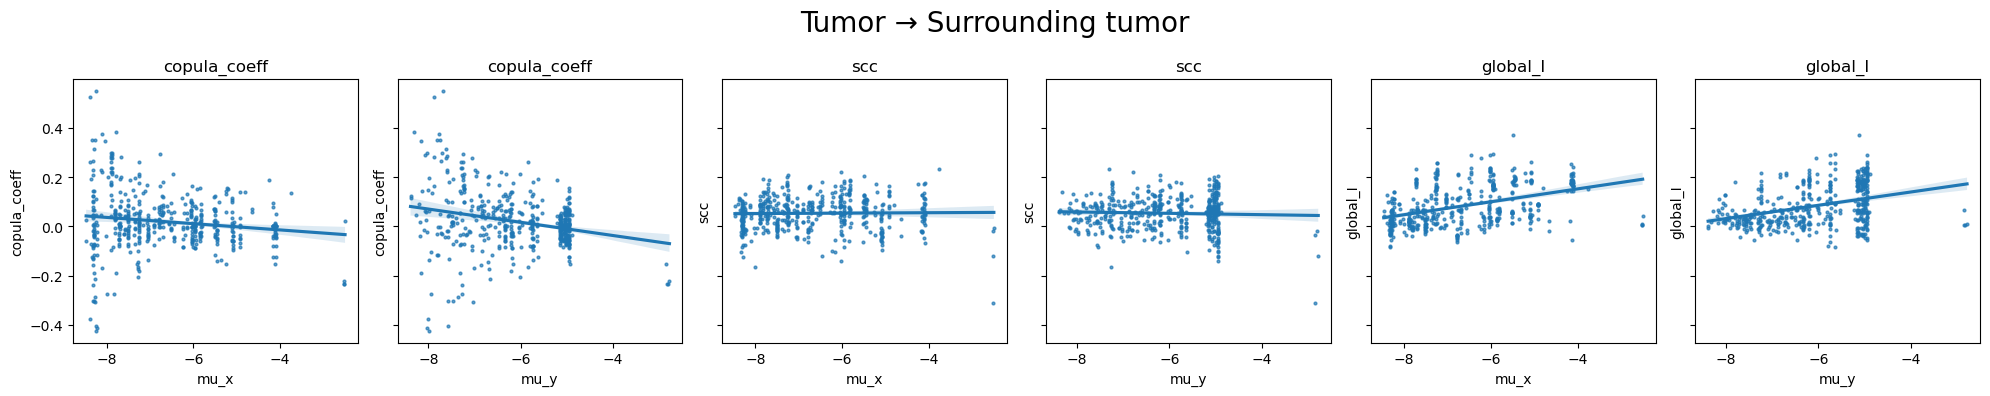

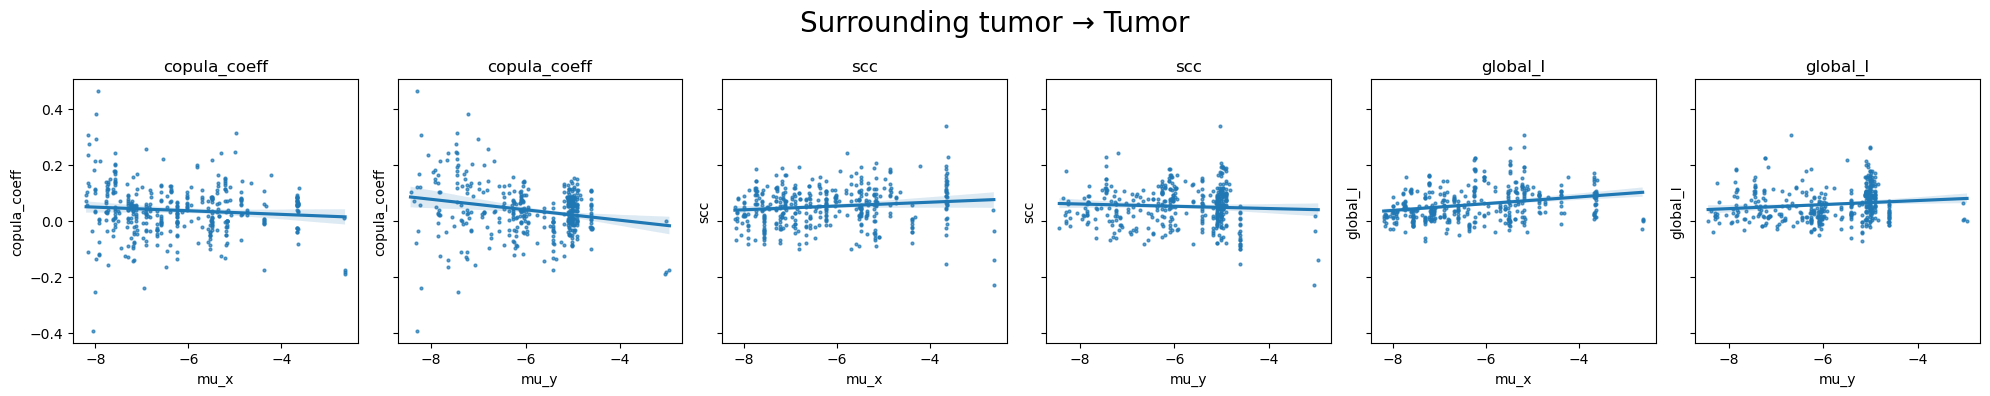

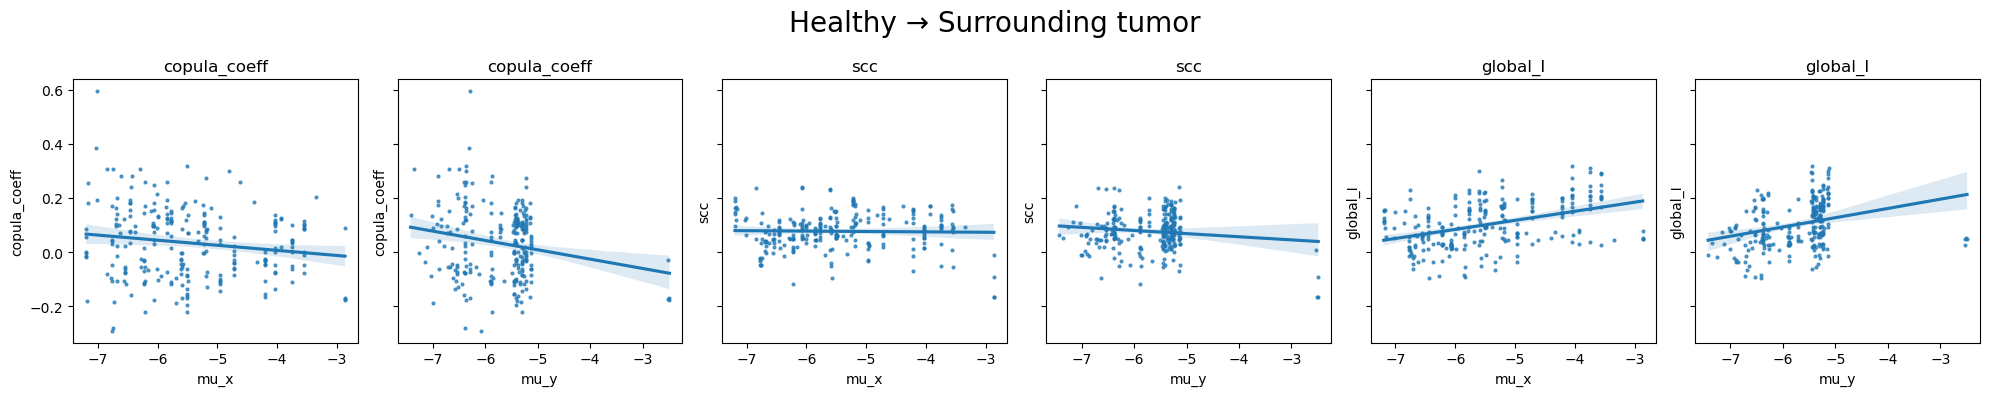

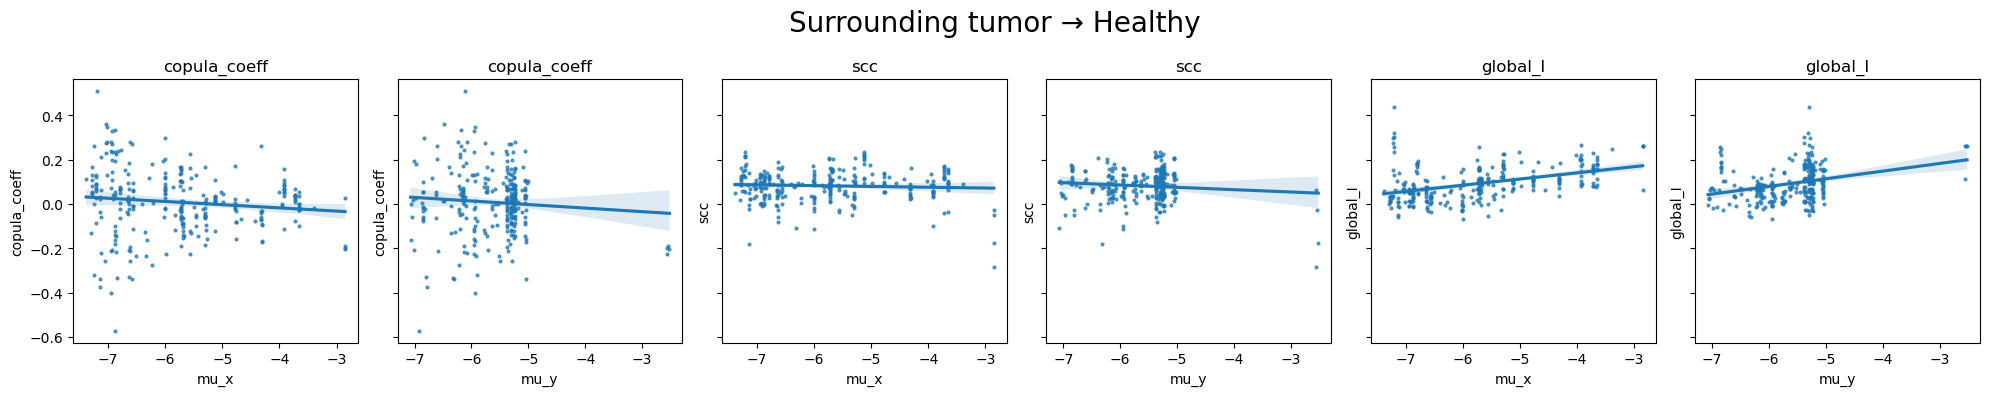

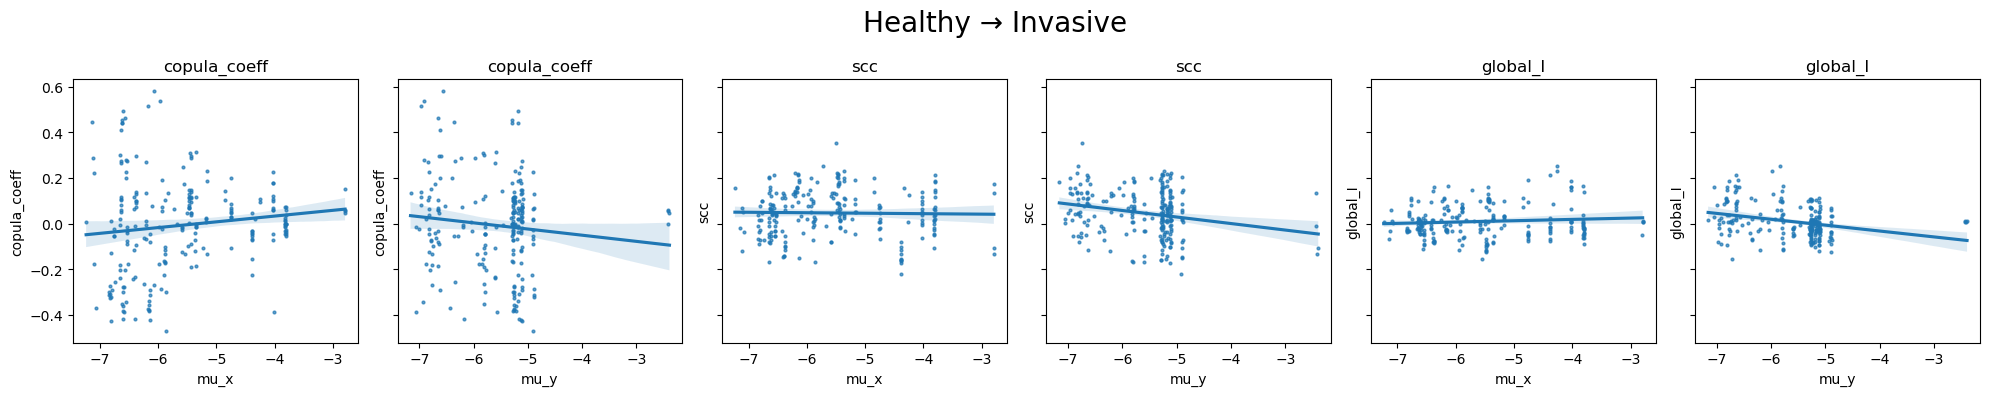

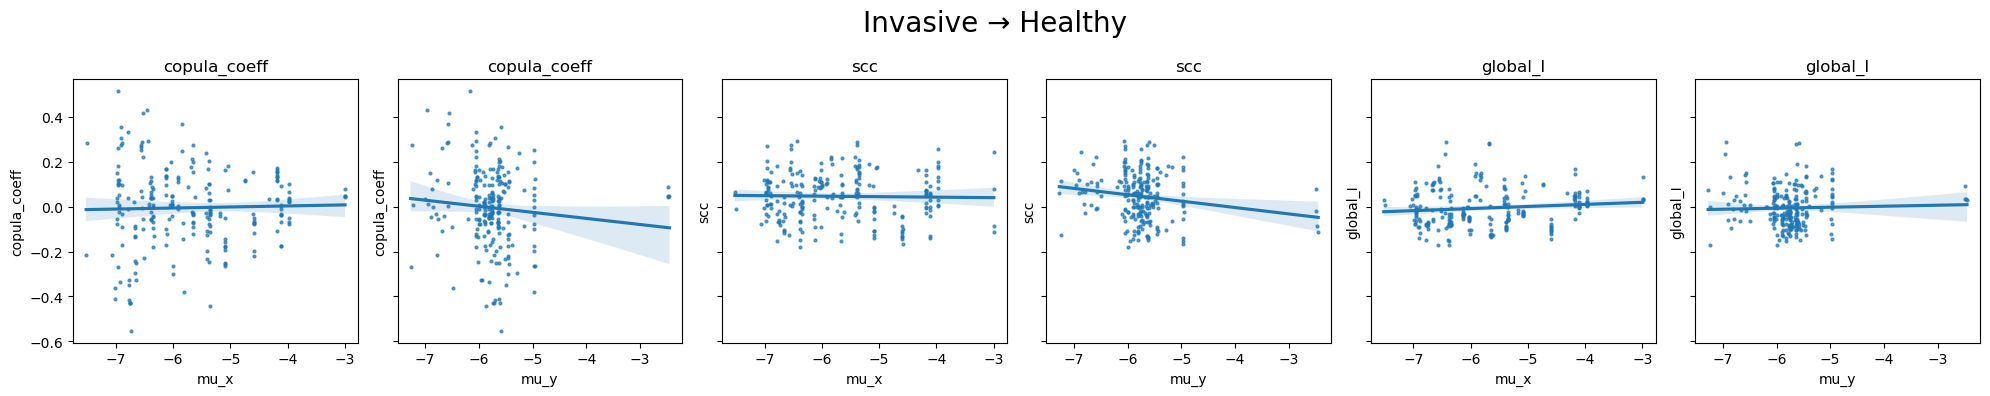

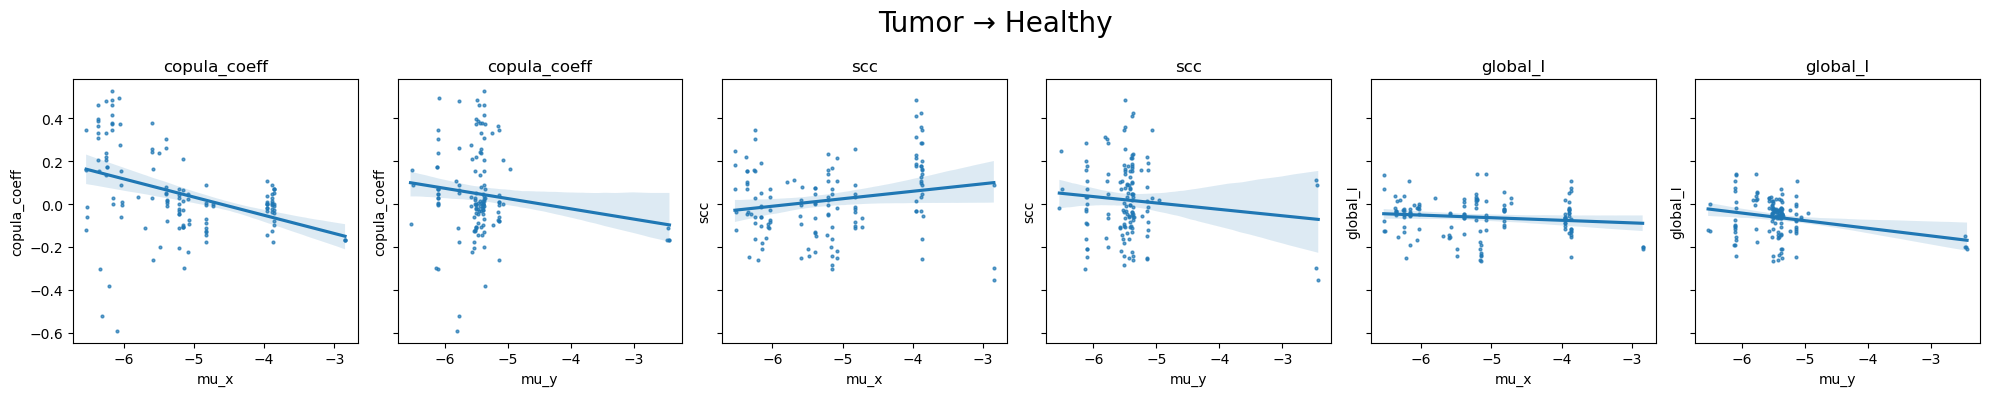

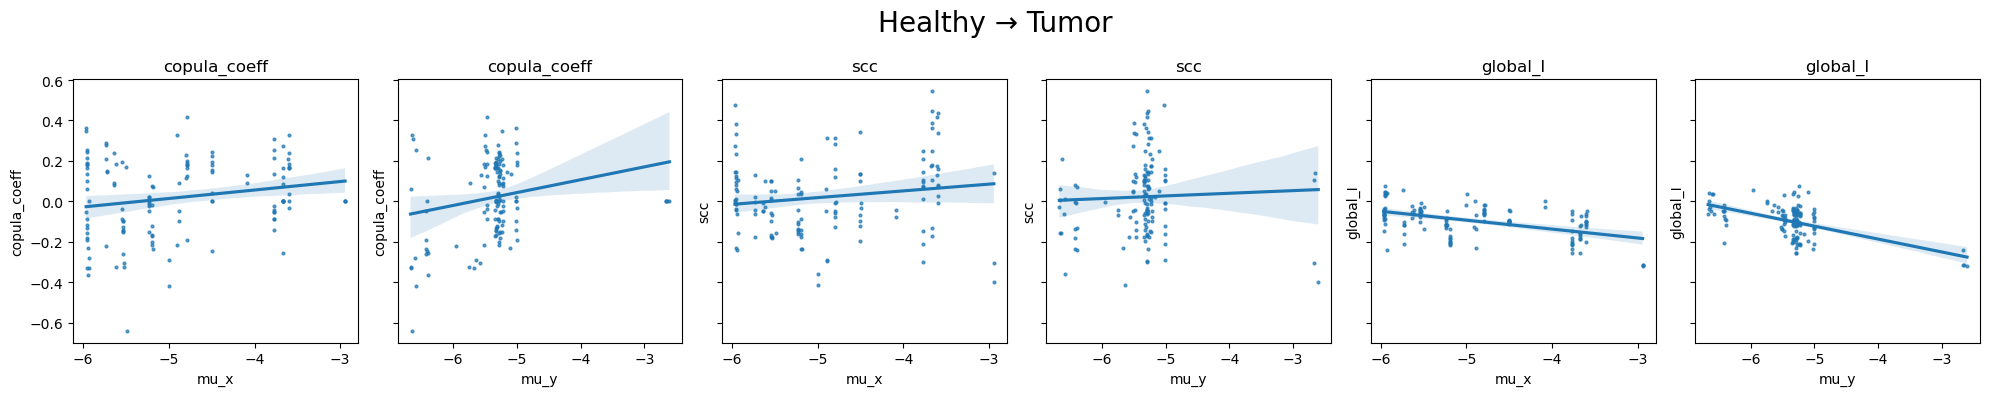

In [168]:
#_, axes = plt.subplots(4, 6, figsize=(18,3*4),sharey=True)
for j, gpair in enumerate(external_edges):
    g11,g12 = gpair.split('=')
    row_idx = 0
    #ax = axes[j,:]
    _, ax = plt.subplots(1, 6, figsize=(20,4),sharey = True)
    tmp = merged_res[gpair].copy()
    tmp = tmp.loc[tmp.copula_method == 'copula']
    tmp = tmp.loc[tmp.index.str.split('_').str[0] != tmp.index.str.split('_').str[1]]
    
    mu_x = tmp['mu_x']
    mu_y = tmp['mu_y']
    min_val = min(mu_x.min(), mu_y.min()) - 0.2
    max_val = max(mu_x.max(), mu_y.max()) + 0.2
    

    abline = np.linspace(min_val, max_val, 100)
    for i,ycol in enumerate(['copula_coeff', 'scc', 'global_I']): 
        
        sns.regplot(x='mu_x', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i])
        sns.regplot(x='mu_y', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i+1])
        
        
        # Remove the legend and add a colorba
        ax[2*i].set_title(ycol)
        ax[2*i+1].set_title(ycol)
        
    plt.suptitle(gpair.replace('=',' → '),fontsize=20)
    plt.tight_layout()
plt.show()

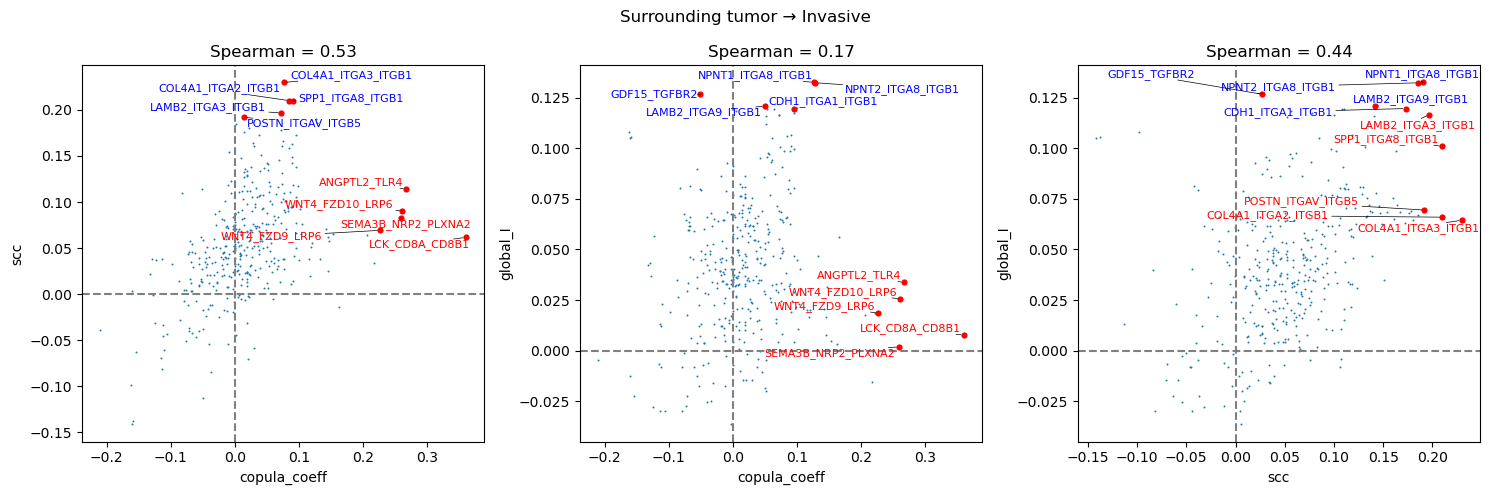

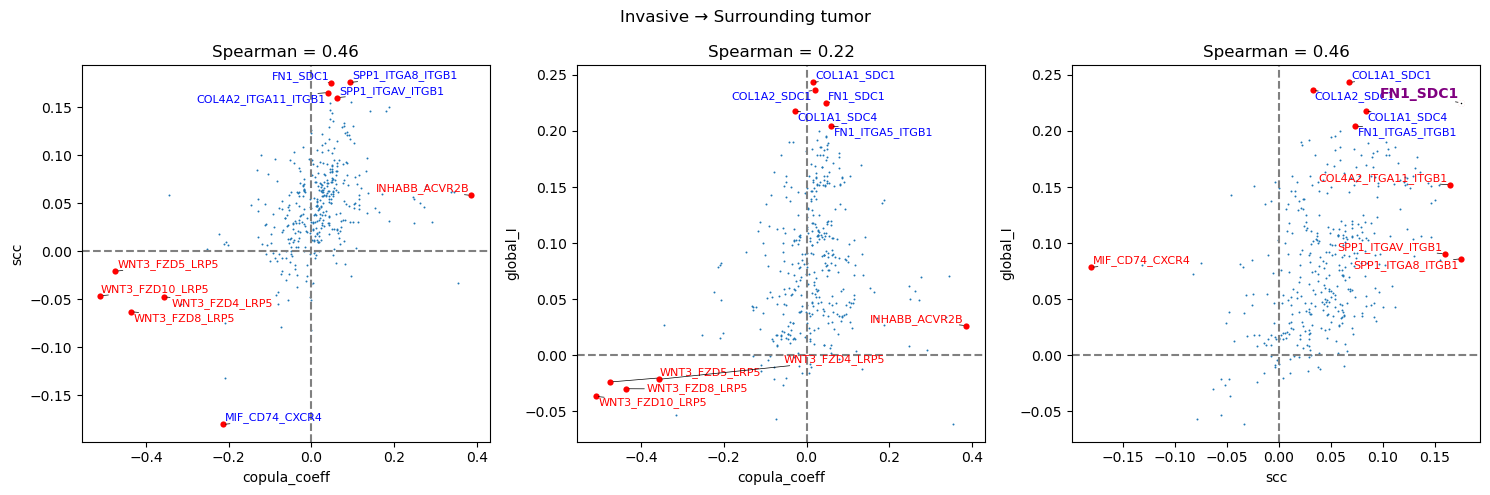

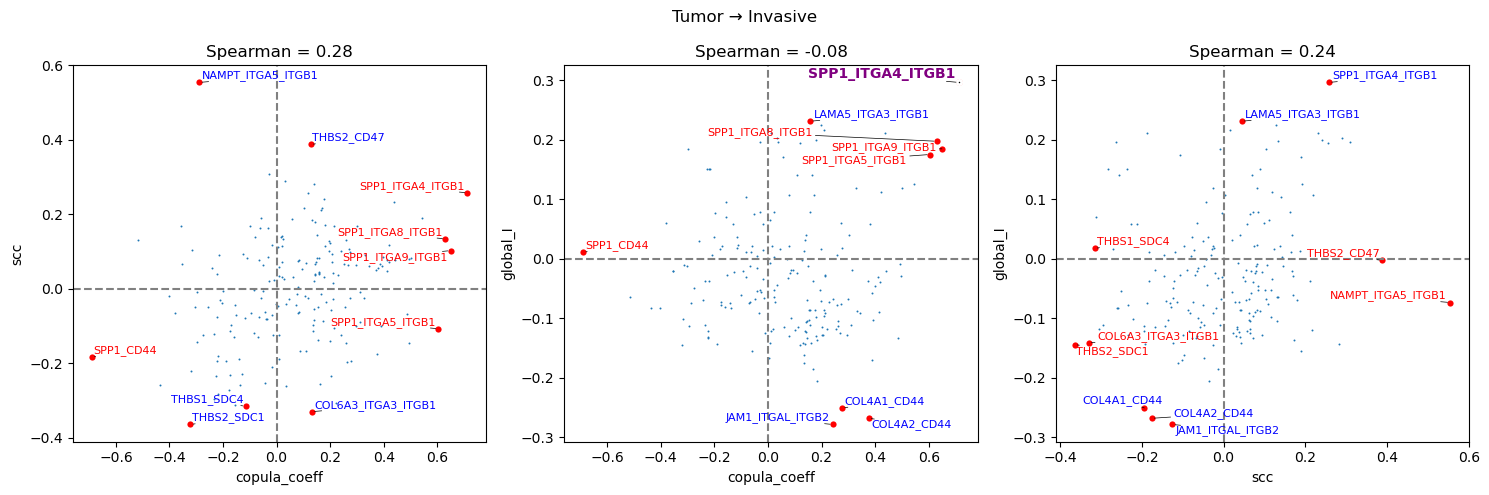

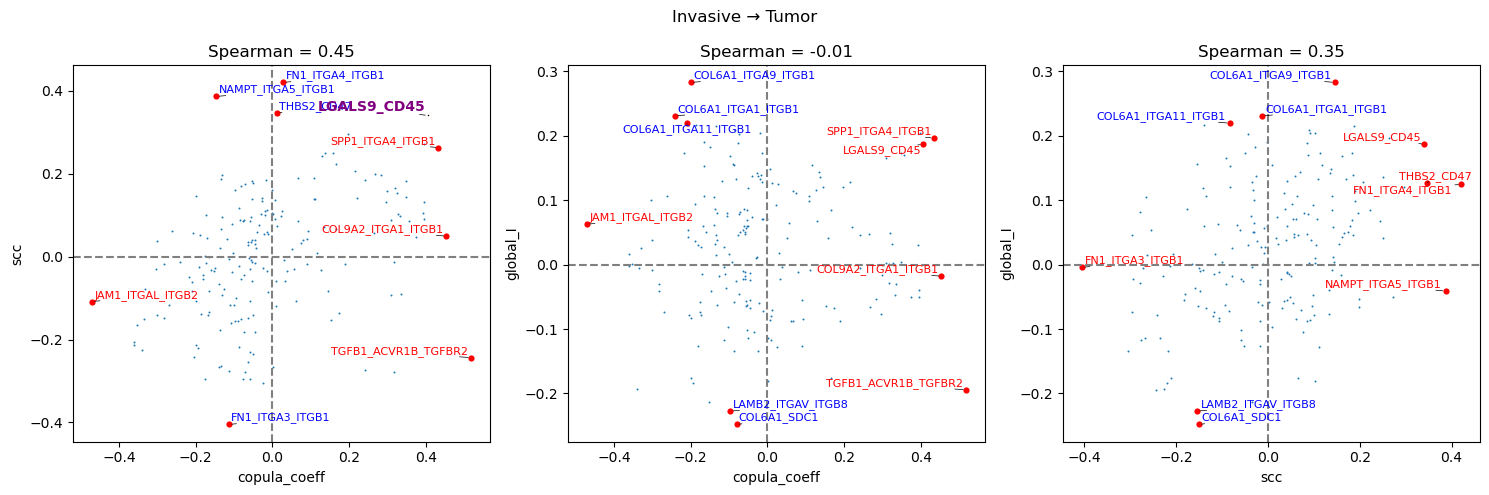

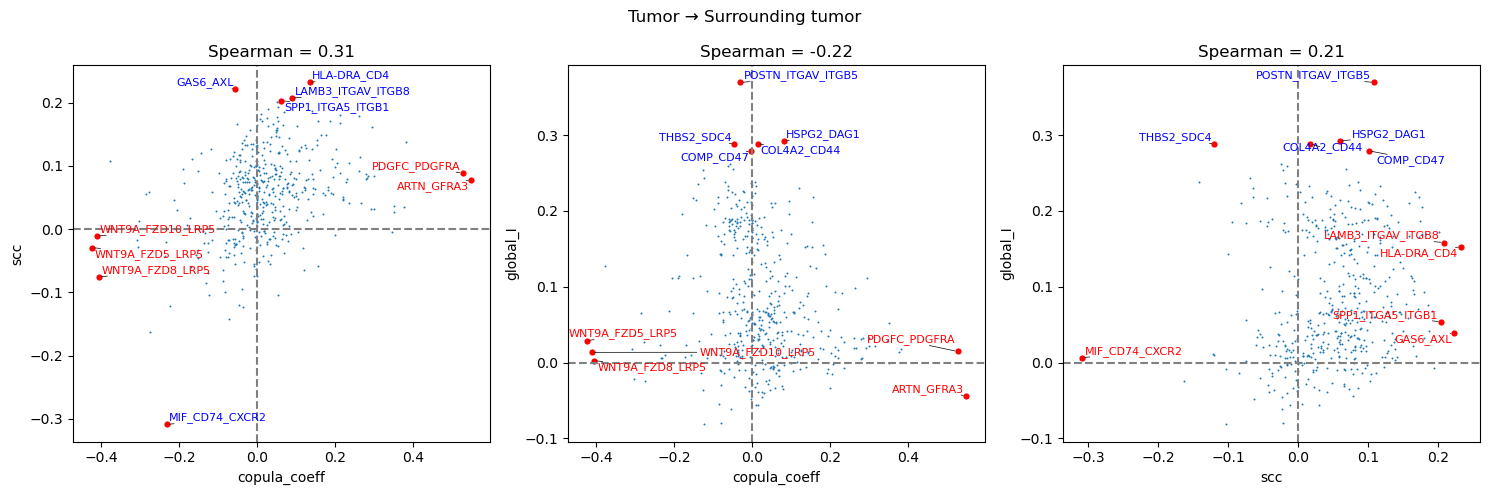

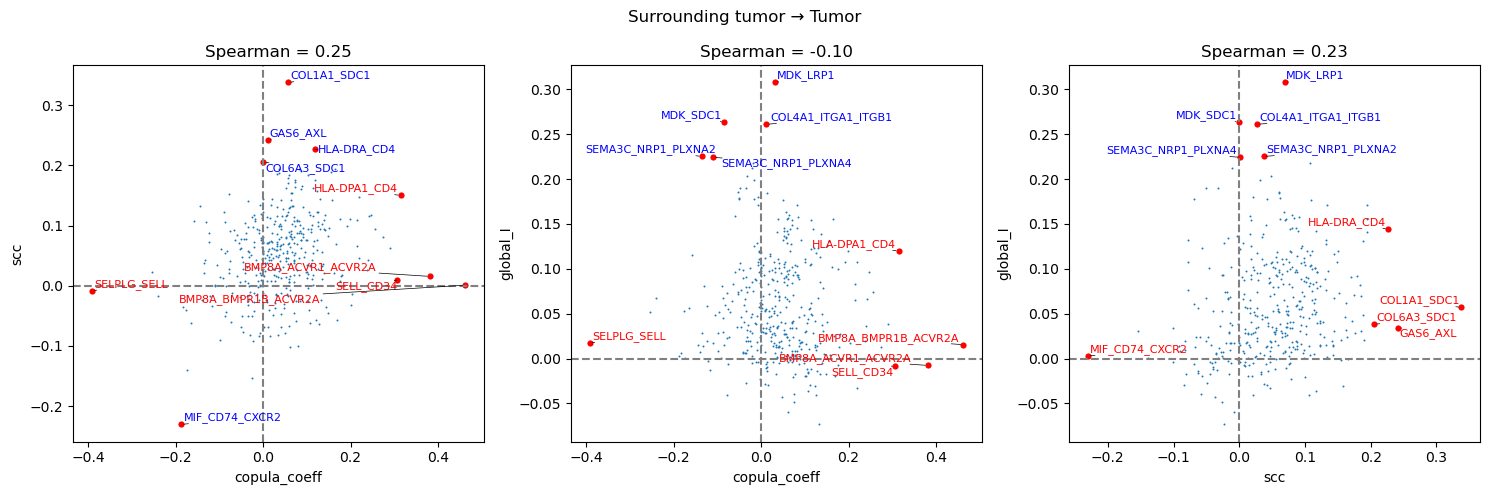

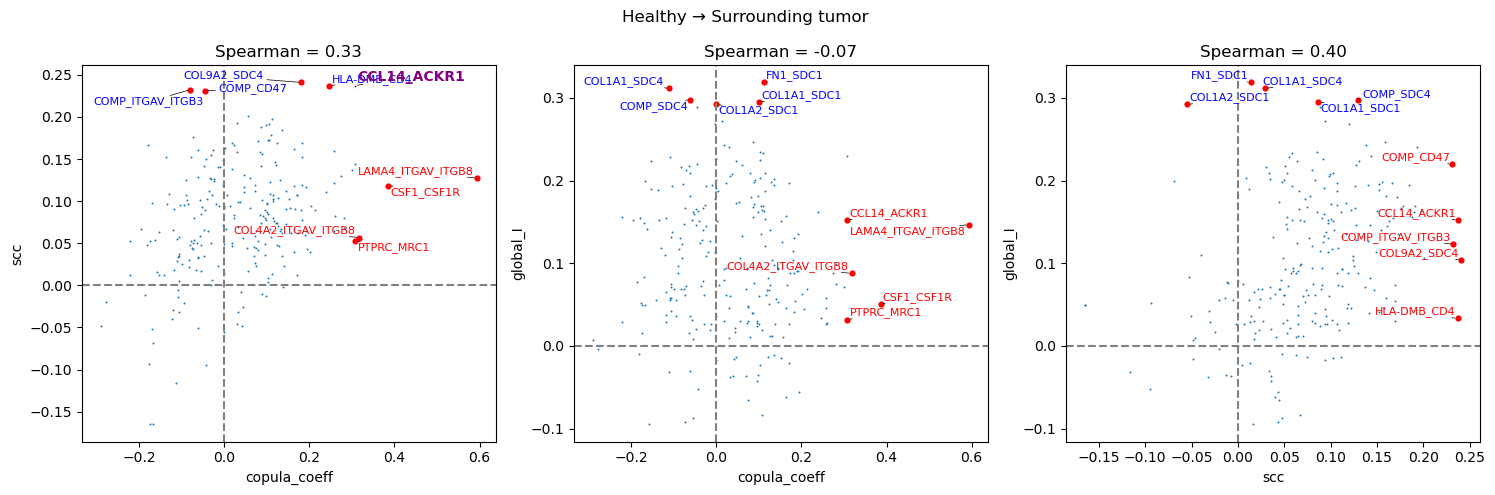

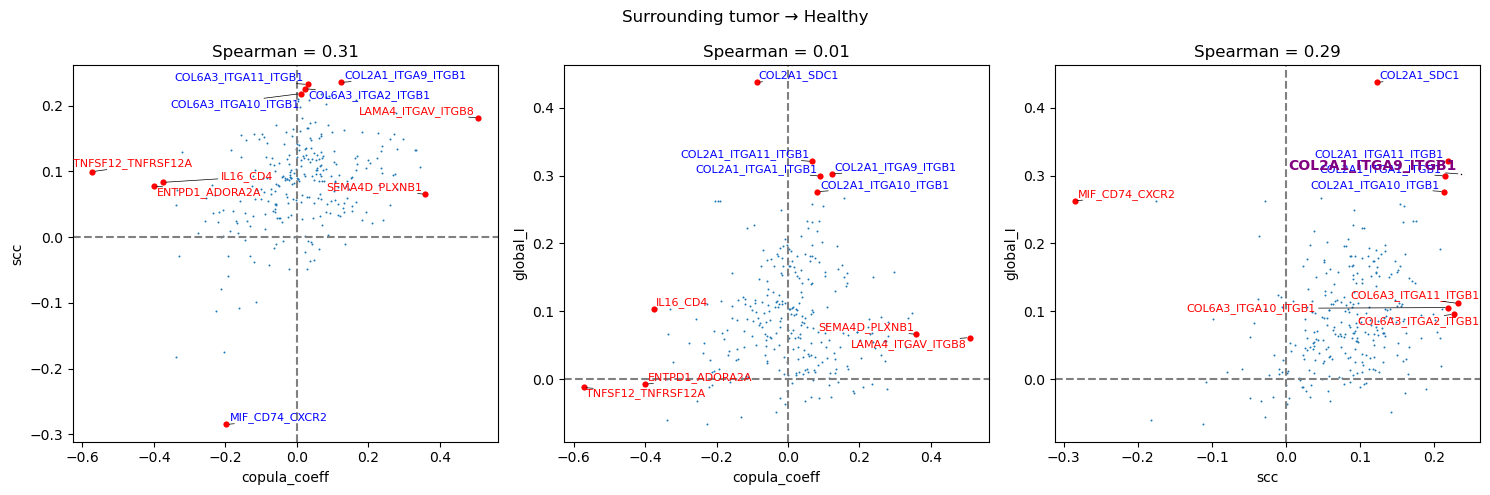

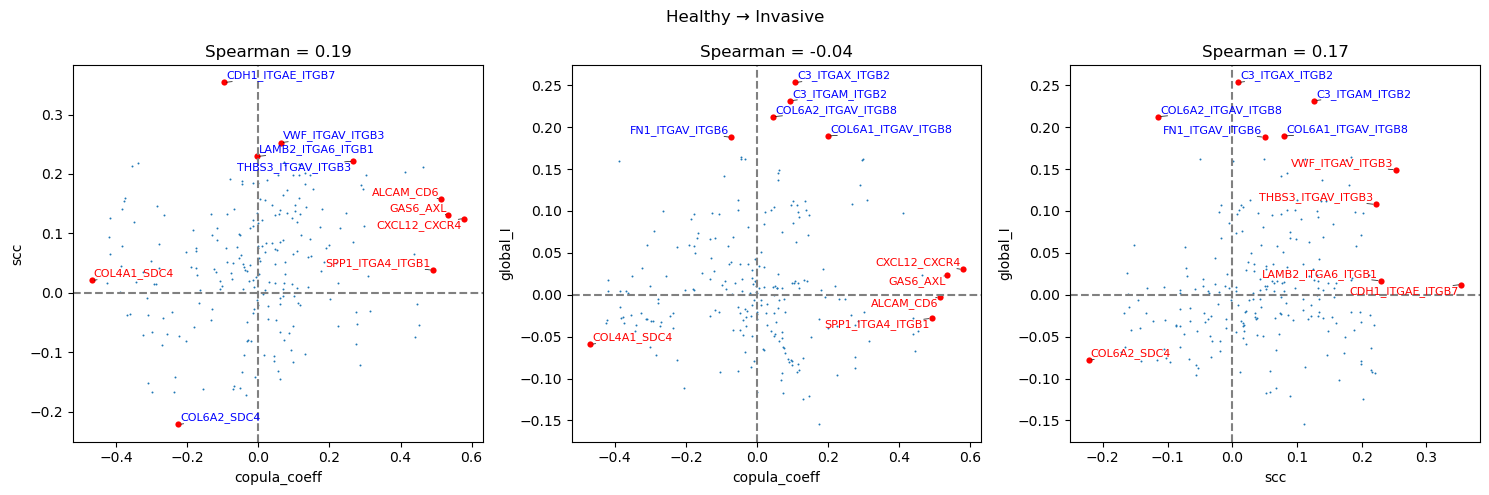

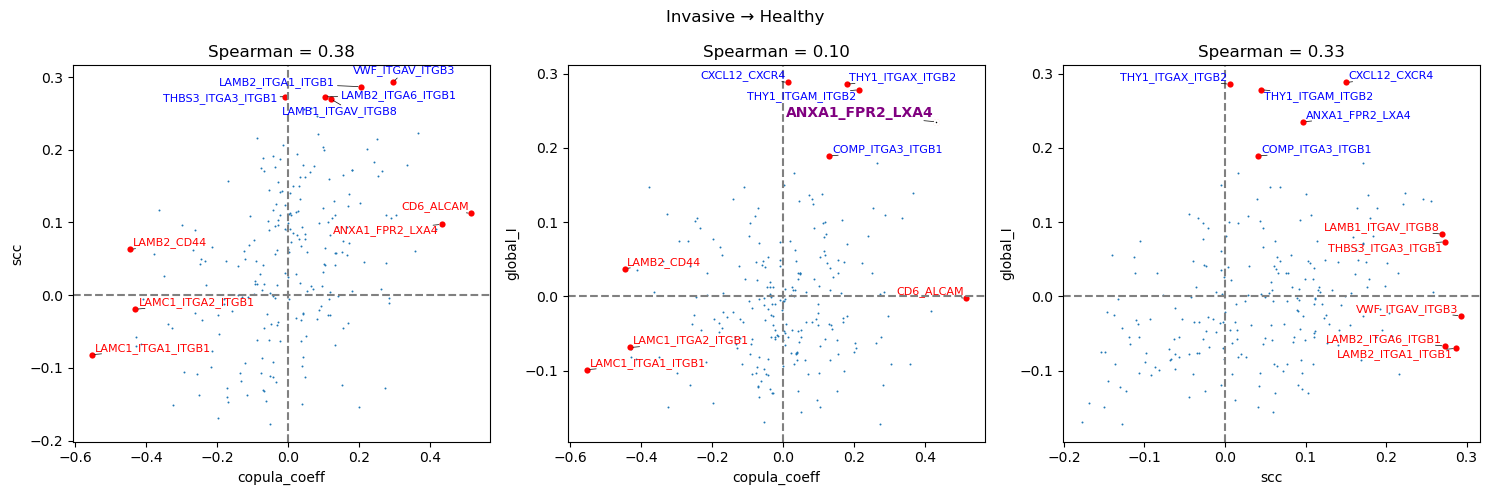

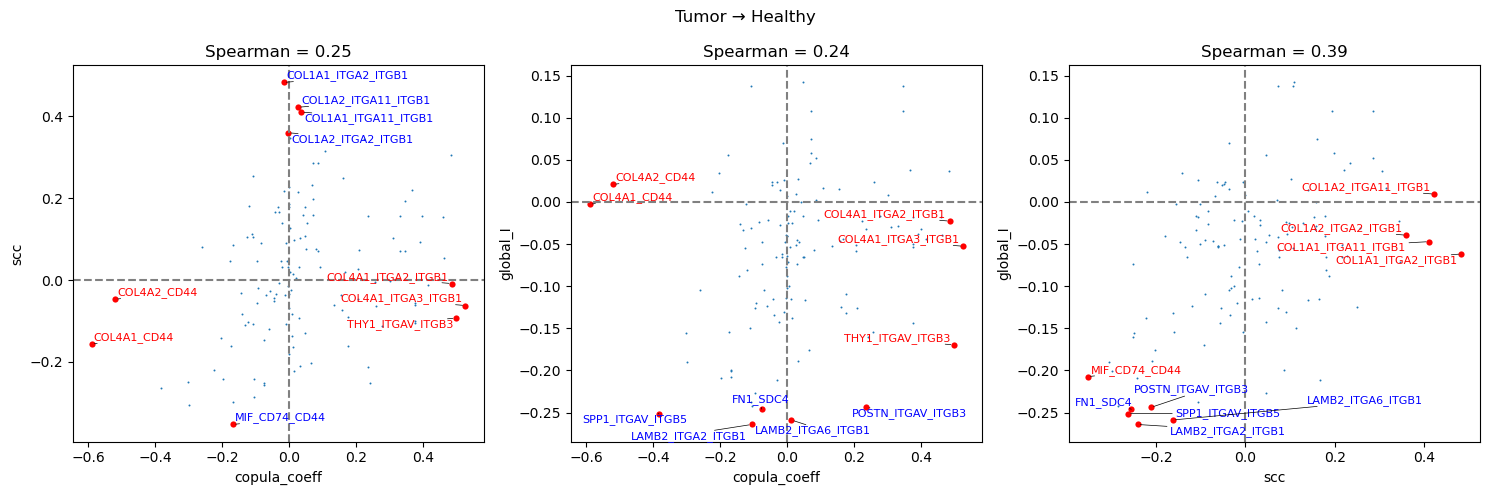

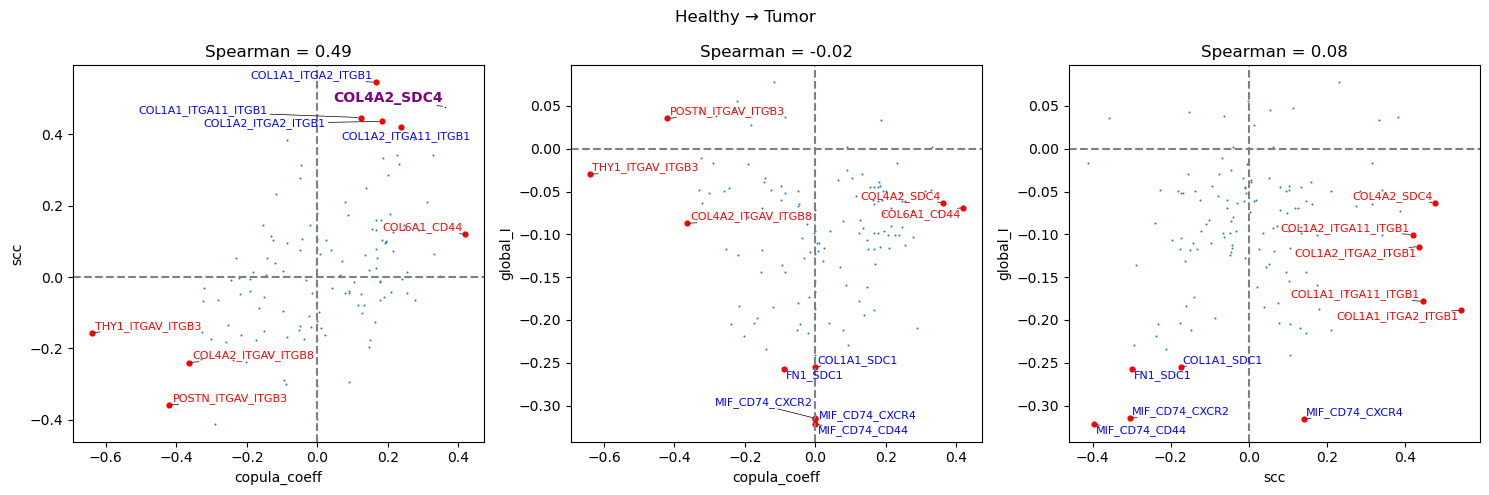

In [170]:
ntop = 5
for gpair in external_edges:
    res = merged_res[gpair].copy()
    #res = res.drop_duplicates(['ligand', 'receptor'])
    # only take non sparse entries
    
    res = res.loc[res.copula_method == 'copula'].fillna(0)
    res = res.loc[res.index.str.split('_').str[0] != res.index.str.split('_').str[1]]
    ncol = len(score_pair)
    _, ax = plt.subplots(1,ncol, figsize=(5*ncol,5))
    for i,(x_col, y_col) in enumerate(score_pair):
        
        sig1 = res.sort_values(by=x_col, key=lambda x: abs(x), ascending=False)[:ntop]
        sig2 = res.sort_values(by=y_col, key=lambda x: abs(x), ascending=False)[:ntop]

        sig12 = sig1.join(sig2, rsuffix='_2',how='inner')
        
        sns.scatterplot(data = res, 
                        x = x_col, 
                        y = y_col, s = 2, linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig1, 
                x = x_col, 
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])
        sns.scatterplot(
                data = sig2, 
                x = x_col,
                y = y_col, 
                s = 20, c='r', linewidth = 0,ax = ax[i])

        text_sig = []
        for j,r in sig1.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(1, 0, 0),
                                        fontsize = 8
                                    ))
        
        for j,r in sig2.drop(sig12.index).iterrows():
            text_sig.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                        s = j,
                                        color=(0, 0, 1),
                                        fontsize = 8
                                    ))
        
        if(len(text_sig) > 0):
            adjust_text(text_sig,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        
        if (len(sig12) > 0):
            sns.scatterplot(data = sig12, 
                                x = x_col, y = y_col, s = 10, c='black', linewidth = 2,
                                ax = ax[i])
            text_sig12 = []
            for j,r in sig12.iterrows():
                text_sig12.append(ax[i].text(x=r[x_col], y = r[y_col], 
                                            s = j,
                                            color = (0.5, 0, 0.5),
                                            fontsize = 10,
                                            weight='bold'
                                        ))
            adjust_text(text_sig12,arrowprops=dict(arrowstyle="-", color='black', lw=0.5),ax=ax[i])
        ax[i].set_title(f'Spearman = { stats.spearmanr(res[x_col].values, res[y_col].values)[0] :.2f}')
        ax[i].axhline(0, color='grey', linestyle='--')
        ax[i].axvline(0, color='grey', linestyle='--')
        
    
    plt.suptitle(gpair.replace('=',' → '))
    plt.tight_layout()
    plt.show()

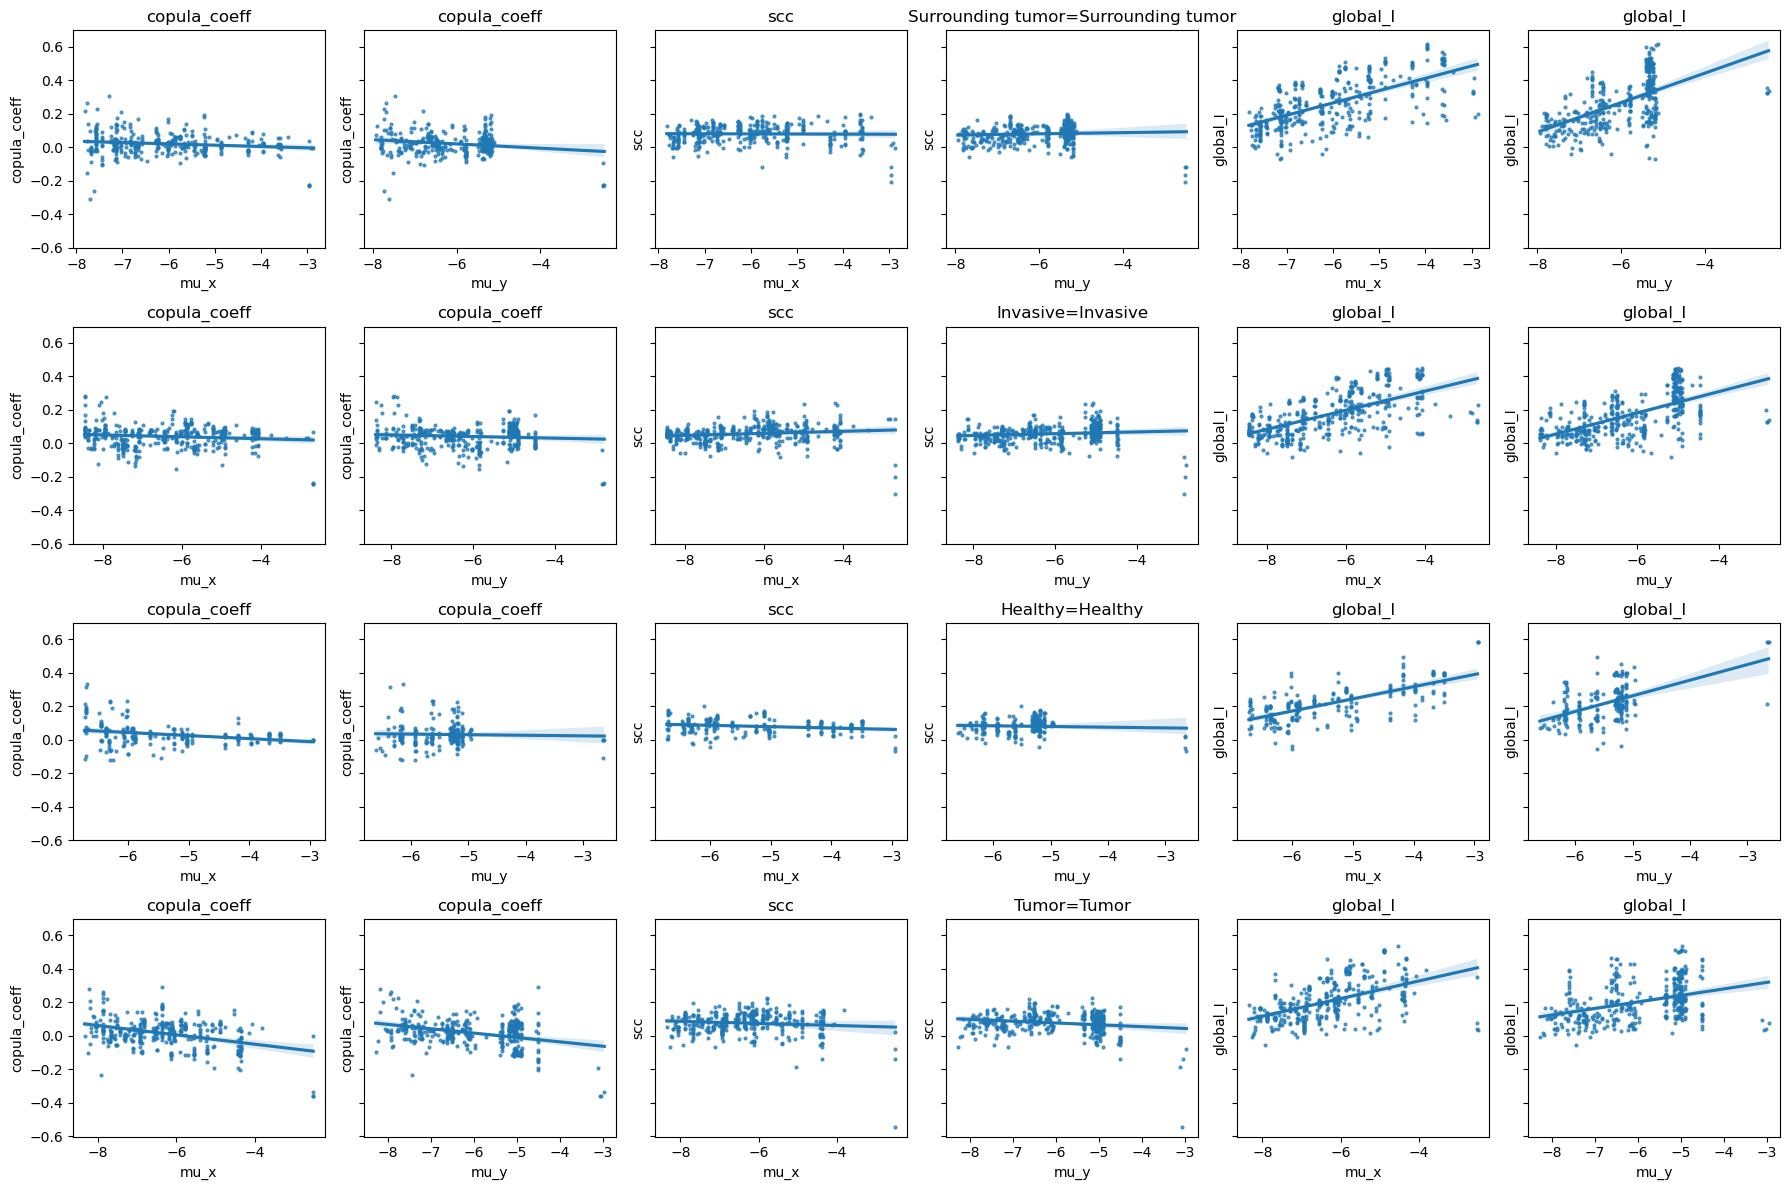

In [166]:
_, axes = plt.subplots(4, 6, figsize=(18,3*4),sharey=True)
for j, gpair in enumerate(internal_edges):
    g11,g12 = gpair.split('=')
    row_idx = 0
    ax = axes[j,:]
    #_, ax = plt.subplots(1, 6, figsize=(20,4),sharey = True)
    tmp = merged_res[gpair].copy()
    tmp = tmp.loc[tmp.copula_method == 'copula']
    tmp = tmp.loc[tmp.index.str.split('_').str[0] != tmp.index.str.split('_').str[1]]
    
    mu_x = tmp['mu_x']
    mu_y = tmp['mu_y']
    min_val = min(mu_x.min(), mu_y.min()) - 0.2
    max_val = max(mu_x.max(), mu_y.max()) + 0.2
    

    abline = np.linspace(min_val, max_val, 100)
    for i,ycol in enumerate(['copula_coeff', 'scc', 'global_I']): 
        
        sns.regplot(x='mu_x', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i])
        sns.regplot(x='mu_y', y=ycol, data=tmp,scatter_kws={'alpha':0.7,'s':4},ax= ax[2*i+1])
        
        
        # Remove the legend and add a colorba
        ax[2*i].set_title(ycol)
        ax[2*i+1].set_title(ycol)
    ax[3].set_title(gpair)    
    #plt.suptitle(gpair.replace('=',' → '),fontsize=20)
    plt.tight_layout()
plt.show()

<Axes: xlabel='global_I', ylabel='global_pval'>

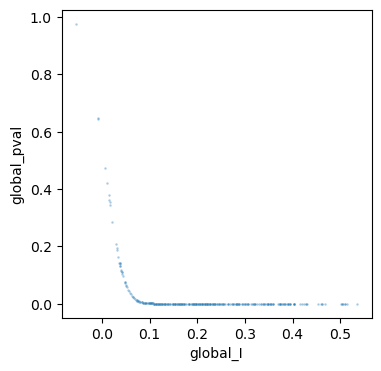

In [144]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=tmp, x = 'global_I', y = 'global_pval', alpha = 0.4, s=3)

(array([ 11.,  78., 188., 226., 200., 121.,  63.,  21.,   3.,   4.]),
 array([-0.06308469, -0.04042332, -0.01776195,  0.00489942,  0.02756079,
         0.05022216,  0.07288353,  0.0955449 ,  0.11820627,  0.14086764,
         0.16352901]),
 <BarContainer object of 10 artists>)

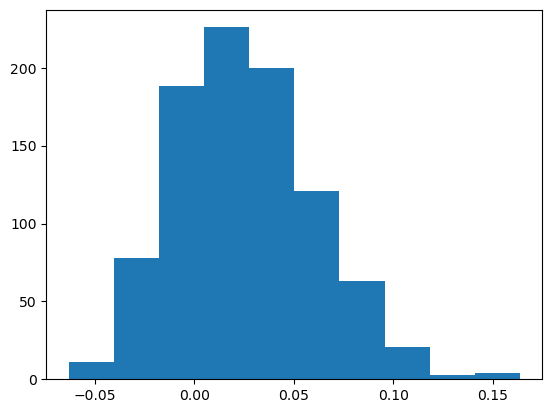

In [89]:
plt.hist(tmp.loc[tmp.copula_method == 'skip', 'scc'])

In [86]:
tmp.sort_values(['scc'], ascending=False)[:10]

copula_coeff      mu_x      mu_y copula_method       scc
NCAM1_NCAM1        0.000000  0.000000  0.000000          skip  0.908013
CDH15_CDH15        0.000000  0.000000  0.000000          skip  0.773557
L1CAM_L1CAM        0.000000  0.000000  0.000000          skip  0.714397
MPZ_MPZ            0.000000  0.000000  0.000000          skip  0.659342
CD99_CD99          0.241928 -5.650078 -5.638517        copula  0.658978
OCLN_OCLN          0.433496 -6.630062 -6.620801        copula  0.646942
CADM1_CADM1        0.693471 -7.702341 -7.692922        copula  0.646578
PTPRM_PTPRM        0.562297 -7.516455 -7.503011        copula  0.634250
MPZL1_MPZL1        0.365454 -6.521009 -6.515778        copula  0.628820
PECAM1_PECAM1      0.245238 -6.289839 -6.265715        copula  0.622496

In [85]:
df_lig_rec

Ligand0 Ligand1 Ligand2 Receptor0 Receptor1 Receptor2 Receptor3
EFNA5_EPHA8   EFNA5    None    None     EPHA8      None      None      None
EFNA5_EPHB2   EFNA5    None    None     EPHB2      None      None      None
EFNB1_EPHA4   EFNB1    None    None     EPHA4      None      None      None
EFNB1_EPHB1   EFNB1    None    None     EPHB1      None      None      None
EFNB1_EPHB2   EFNB1    None    None     EPHB2      None      None      None
...             ...     ...     ...       ...       ...       ...       ...
CCL3_CCR5      CCL3    None    None      CCR5      None      None      None
CCL5_CCR5      CCL5    None    None      CCR5      None      None      None
CCL4_CCR5      CCL4    None    None      CCR5      None      None      None
CXCL1_ACKR1   CXCL1    None    None     ACKR1      None      None      None
CORT_SSTR2     CORT    None    None     SSTR2      None      None      None

[1315 rows x 7 columns]

In [155]:
internal_edges

array(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive',
       'Healthy=Healthy', 'Tumor=Tumor'], dtype=object)

In [161]:
importlib.reload(model)

<module 'model' from '/Users/hs0424/Workspace/copulacci/src/copulacci/model.py'>

In [162]:
final_res_cop = model.add_copula_pval(
    data_list_dict,
    cop_df_dict,
    umi_sums,
    int_edges_new_with_selfloops=int_edges_with_selfloop,
    count_df=count_df,
    percentile_cutoff = 90,
    n = 500,
    groups = ['Surrounding tumor=Surrounding tumor'],
    heteronomic = True
)

The permutation of spatial points for every L-R pair over 1K times will take a while ...
permutation test for ... Surrounding tumor=Surrounding tumor
found  38  pairs..
37

computing pval for  Surrounding tumor=Surrounding tumor  with  38  pairs in  626.3583941459656  seconds


In [173]:
import gseapy_like_plot as pl

In [174]:
loc = adata.obsm['spatial']

loc_df = pd.DataFrame(loc).rename(columns = {0:"x", 1:"y"})
loc_df.loc[:,"cell"] = adata.obs_names
loc_df.set_index('cell', inplace=True)

In [190]:
cop_df_dict['Surrounding tumor=Surrounding tumor']

copula_coeff      mu_x      mu_y copula_method       scc
EFNA5_EPHA8       0.00000  0.000000  0.000000          skip       NaN
EFNA5_EPHB2       0.00000  0.000000  0.000000          skip -0.021352
EFNB1_EPHA4       0.00000  0.000000  0.000000          skip  0.000622
EFNB1_EPHB1       0.00000  0.000000  0.000000          skip  0.034523
EFNB1_EPHB2       0.00000  0.000000  0.000000          skip  0.060689
...                   ...       ...       ...           ...       ...
CCL3_CCR5         0.00000  0.000000  0.000000          skip  0.025578
CCL5_CCR5         0.02893 -6.002989 -7.799514        copula  0.072918
CCL4_CCR5         0.00000  0.000000  0.000000          skip  0.024945
CXCL1_ACKR1       0.00000  0.000000  0.000000          skip -0.012809
CORT_SSTR2        0.00000  0.000000  0.000000          skip -0.032417

[1315 rows x 5 columns]

In [195]:
cop_df_dict.keys()

dict_keys(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive', 'Healthy=Healthy', 'Tumor=Tumor', 'Surrounding tumor=Invasive', 'Invasive=Surrounding tumor', 'Tumor=Invasive', 'Invasive=Tumor', 'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor', 'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy', 'Healthy=Invasive', 'Invasive=Healthy', 'Tumor=Healthy', 'Healthy=Tumor'])

In [ ]:
def plot_raw_lr_boundary_expression(
    lig_rec_idx,
    int_type,
    loc_df,
    int_edges_new
):
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.interaction == int_type,
        :
    ].copy()
    genes_to_show = lig_rec_idx.split("_")
    genes_to_show = [gene for gene in genes_to_show if gene in count_df.columns]

    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(
        count_df.loc[selected_cells, genes_to_show[0]],
        count_df.loc[selected_cells, genes_to_show[1]]
        s = 5
    )

    

In [280]:
def plot_raw_lr_boundary_expression(
    lig_rec_idx,
    int_type,
    loc_df,
    int_edges_new
):
    lr_pairs_ct = int_edges_new.loc[
        int_edges_new.interaction == int_type,
        :
    ].copy()
    genes_to_show = lig_rec_idx.split("_")
    genes_to_show = [gene for gene in genes_to_show if gene in count_df.columns]
    
    #sns.scatterplot(data = int_loc_df, x = "x", y = "y", s = 8, hue='dist_from_z', ax=ax, alpha=0.8,label='start')
    selected_cells = list(
        set(lr_pairs_ct.cell1.unique()).union(
            lr_pairs_ct.cell2.unique()   
        )
    )
    
    fig, ax = plt.subplots(1,len(genes_to_show),
                           figsize=(5*len(genes_to_show),5))
    for i,gene in enumerate(genes_to_show):
        ax[i].scatter(loc_df['x'], loc_df['y'], c= "grey", s=0.4,alpha = 0.4)
        colors = np.array(count_df.loc[selected_cells, gene].values)
        tmp = loc_df.loc[selected_cells,:].copy()
        tmp.loc[:, 'gene'] = colors
        sns.scatterplot(x='x', y='y', hue='gene',
                             palette='Reds',s=20, data=tmp,alpha=0.7,ax= ax[i])

        norm = Normalize(tmp['gene'].min(), tmp['gene'].max())
        sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
        sm.set_array([])
        
        # Remove the legend and add a colorbar
        ax[i].get_legend().remove()
        
    
        ax[i].set_title(gene + "\n" + int_type.replace('=',' → '))
        ax[i].figure.colorbar(sm,ax=ax[i])
        ax[i].invert_yaxis()
        ax[i].set_xticks([])
        ax[i].set_yticks([]);
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].spines['left'].set_visible(False)
    
        ax[i].set_xlabel("spatial1")
        ax[i].set_ylabel("spatial2")
    plt.tight_layout()
    plt.show()


In [279]:
cop_df_dict['Surrounding tumor=Surrounding tumor'].sort_values(['copula_coeff'], ascending =False)[9:10].index

Index(['LCK_CD8A_CD8B1'], dtype='object')

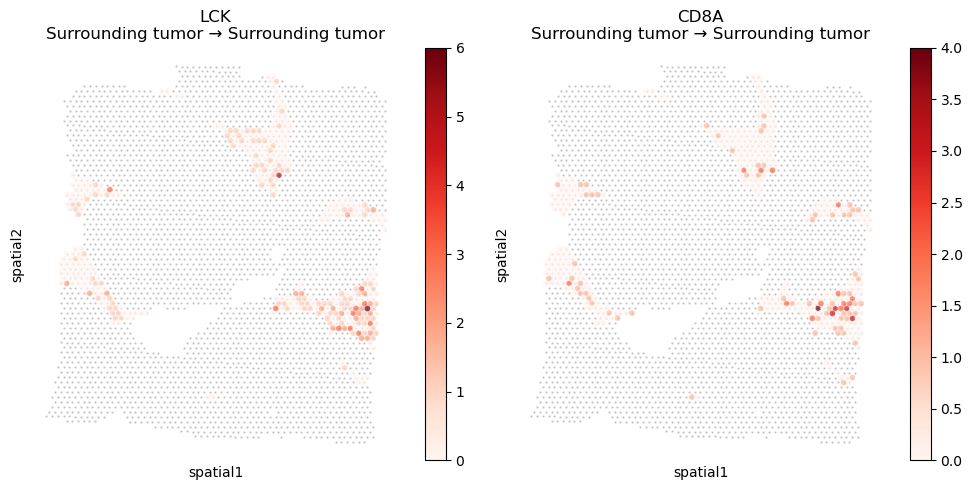

In [281]:
lig_rec_idx = 'LCK_CD8A_CD8B1'
plot_raw_lr_boundary_expression(
    lig_rec_idx,
    'Surrounding tumor=Surrounding tumor',
    loc_df,
    int_edges_new
)

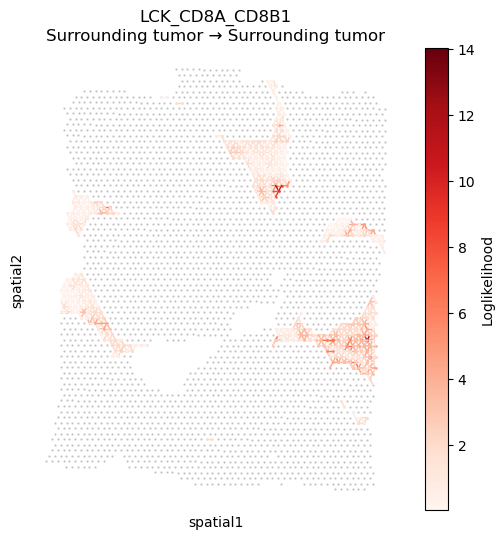

In [282]:
plot_lr_interaction_boundary_activity_color(
    df_lig_rec,
    lig_rec_idx,
    'Surrounding tumor=Surrounding tumor',
    cop_df_dict,
    loc_df,
    int_edges_new,
    umi_sums,
    data_list_dict
)

In [200]:
cop_df_dict['Surrounding tumor=Surrounding tumor'].loc[lig_rec_idx,]

copula_coeff      0.23089
mu_x            -7.557745
mu_y            -7.750672
copula_method      copula
scc              0.090847
Name: ANGPTL2_TLR4, dtype: object

## Read the pvalues

In [284]:
data_dir = '/Users/hs0424/Workspace/copulacci/notebook/orator_paper_notebook/data/human_breast_visium/pvalue_results_all/'

In [291]:
import os
dfs = []
for gpair in data_list_dict.keys():
    file_name = 'final_res_copula_' + gpair + '.csv'
    tmp = pd.read_csv(
        os.path.join(data_dir, file_name),
    )
    tmp.loc[:, 'gpair'] = gpair
    dfs += [tmp.copy()]

In [293]:
cop_sig_df = pd.concat(dfs, axis=0)

In [294]:
cop_sig_df['source'] = cop_sig_df.celltype_direction.str.split("=").str[0]
cop_sig_df['target'] = cop_sig_df.celltype_direction.str.split("=").str[1]

In [298]:
cop_sig_df.head()

copula_coeff      mu_x      mu_y copula_method         lig_rec      pval  \
0      0.304357 -7.288500 -7.482881        copula  LCK_CD8A_CD8B1  0.000000   
1      0.102163 -7.115818 -7.743477        copula       ICAM1_SPN  0.001996   
2      0.112254 -6.281728 -7.597780        copula      PTPRC_MRC1  0.000000   
3      0.217831 -7.819817 -6.810009        copula       DSC2_DSG2  0.000000   
4      0.134010 -7.144459 -6.108813        copula     JAG1_NOTCH3  0.000000   

       qval                   celltype_direction  \
0  0.000000  Surrounding tumor=Surrounding tumor   
1  0.002528  Surrounding tumor=Surrounding tumor   
2  0.000000  Surrounding tumor=Surrounding tumor   
3  0.000000  Surrounding tumor=Surrounding tumor   
4  0.000000  Surrounding tumor=Surrounding tumor   

                                 gpair             source             target  
0  Surrounding tumor=Surrounding tumor  Surrounding tumor  Surrounding tumor  
1  Surrounding tumor=Surrounding tumor  Surrounding tumor  Surrounding tumor  
2  Surrounding tumor=Surrounding tumor  Surrounding tumor  Surrounding tumor  
3  Surrounding tumor=Surrounding tumor  Surrounding tumor  Surrounding tumor  
4  Surrounding tumor=Surrounding tumor  Surrounding tumor  Surrounding tumor

In [305]:
importlib.reload(pl)

<module 'gseapy_like_plot' from '/Users/hs0424/Workspace/copulacci/src/copulacci/gseapy_like_plot.py'>

In [309]:
cop_sig_df.celltype_direction.unique()

array(['Surrounding tumor=Surrounding tumor', 'Invasive=Invasive',
       'Healthy=Healthy', 'Tumor=Tumor', 'Surrounding tumor=Invasive',
       'Invasive=Surrounding tumor', 'Tumor=Invasive', 'Invasive=Tumor',
       'Tumor=Surrounding tumor', 'Surrounding tumor=Tumor',
       'Healthy=Surrounding tumor', 'Surrounding tumor=Healthy',
       'Healthy=Invasive', 'Invasive=Healthy', 'Tumor=Healthy',
       'Healthy=Tumor'], dtype=object)

In [350]:
cop_sig_df.loc[:,'celltype_arrow'] = cop_sig_df.celltype_direction.str.replace("="," → ")

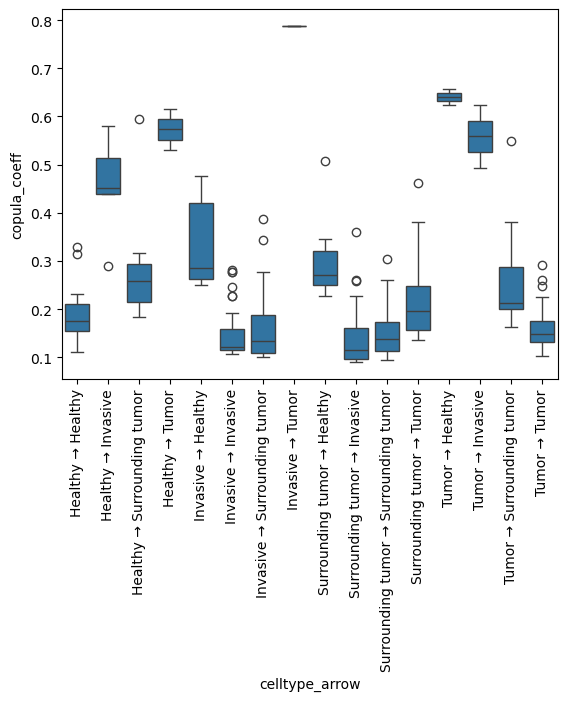

In [353]:
qval_cutoff = 0.01
ax = sns.boxplot(
    data = cop_sig_df.loc[cop_sig_df.qval < qval_cutoff].sort_values(['gpair']),
    x = 'celltype_arrow',
    y = 'copula_coeff'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [383]:
ct = 'Tumor'
cop_sig_df_tumor = cop_sig_df.loc[
    ((cop_sig_df.source == ct) | (cop_sig_df.target == ct))
].copy()

In [384]:
cop_sig_df_tumor.sort_values(['qval','copula_coeff'],
                             ascending=[True, False]).groupby('celltype_direction').head(3).sort_values(['gpair'])

copula_coeff      mu_x      mu_y copula_method              lig_rec  \
5       0.651963 -5.879075 -7.907939        copula           HLA-F_CD8B   
8       0.615327 -4.383647 -6.804239        copula         HLA-DRB5_CD4   
6       0.530750 -4.490933 -6.782909        copula         HLA-DPB1_CD4   
9       0.787962 -7.674600 -6.593094        copula        SEMA4D_PLXNB1   
2       0.592056 -6.954382 -8.060234        copula            ICAM1_SPN   
14      0.469968 -6.143208 -7.831976        copula       RARRES2_CMKLR1   
3       0.314470 -4.981944 -7.444855        copula         HLA-DPA1_CD4   
28      0.462081 -7.940286 -8.299085        copula  BMP8A_BMPR1B_ACVR2A   
30      0.380949 -7.981757 -7.215445        copula   BMP8A_ACVR1_ACVR2A   
24      0.756788 -7.303579 -6.362361        copula       WNT4_FZD6_LRP6   
2       0.624689 -5.269763 -6.906674        copula    ITGA4_ITGB1_VCAM1   
3       0.657690 -5.330541 -6.898146        copula    ITGA9_ITGB1_VCAM1   
2       0.623917 -7.682004 -5.857026        copula     JAM3_ITGAM_ITGB2   
17      0.494022 -6.515055 -6.647007        copula   SEMA3C_NRP2_PLXNA3   
37      0.712379 -6.329872 -5.333104        copula     SPP1_ITGA4_ITGB1   
48      0.381707 -7.775838 -8.316783        copula         CXCL11_CXCR3   
30      0.548438 -8.252942 -7.683144        copula           ARTN_GFRA3   
46      0.352050 -8.330675 -7.736645        copula           PGF_VEGFR1   
20      0.291074 -6.355930 -4.498773        copula          COL2A1_SDC4   
32      0.260795 -7.880782 -7.917404        copula      WNT3_FZD10_LRP5   
35      0.248133 -7.881665 -7.949926        copula       WNT3_FZD9_LRP5   

        pval      qval       celltype_direction                    gpair  \
5   0.001996  0.027279            Healthy=Tumor            Healthy=Tumor   
8   0.000000  0.000000            Healthy=Tumor            Healthy=Tumor   
6   0.000000  0.000000            Healthy=Tumor            Healthy=Tumor   
9   0.000000  0.000000           Invasive=Tumor           Invasive=Tumor   
2   0.001996  0.027279           Invasive=Tumor           Invasive=Tumor   
14  0.001996  0.027279           Invasive=Tumor           Invasive=Tumor   
3   0.000000  0.000000  Surrounding tumor=Tumor  Surrounding tumor=Tumor   
28  0.000000  0.000000  Surrounding tumor=Tumor  Surrounding tumor=Tumor   
30  0.000000  0.000000  Surrounding tumor=Tumor  Surrounding tumor=Tumor   
24  0.001996  0.017565            Tumor=Healthy            Tumor=Healthy   
2   0.000000  0.000000            Tumor=Healthy            Tumor=Healthy   
3   0.000000  0.000000            Tumor=Healthy            Tumor=Healthy   
2   0.000000  0.000000           Tumor=Invasive           Tumor=Invasive   
17  0.000000  0.000000           Tumor=Invasive           Tumor=Invasive   
37  0.001996  0.029275           Tumor=Invasive           Tumor=Invasive   
48  0.000000  0.000000  Tumor=Surrounding tumor  Tumor=Surrounding tumor   
30  0.000000  0.000000  Tumor=Surrounding tumor  Tumor=Surrounding tumor   
46  0.000000  0.000000  Tumor=Surrounding tumor  Tumor=Surrounding tumor   
20  0.000000  0.000000              Tumor=Tumor              Tumor=Tumor   
32  0.000000  0.000000              Tumor=Tumor              Tumor=Tumor   
35  0.000000  0.000000              Tumor=Tumor              Tumor=Tumor   

               source             target             celltype_arrow  
5             Healthy              Tumor            Healthy → Tumor  
8             Healthy              Tumor            Healthy → Tumor  
6             Healthy              Tumor            Healthy → Tumor  
9            Invasive              Tumor           Invasive → Tumor  
2            Invasive              Tumor           Invasive → Tumor  
14           Invasive              Tumor           Invasive → Tumor  
3   Surrounding tumor              Tumor  Surrounding tumor → Tumor  
28  Surrounding tumor              Tumor  Surrounding tumor → Tumor  
30  Surrounding tumor              Tumor  Surround

p_inv


<Axes: xlabel='celltype_direction'>

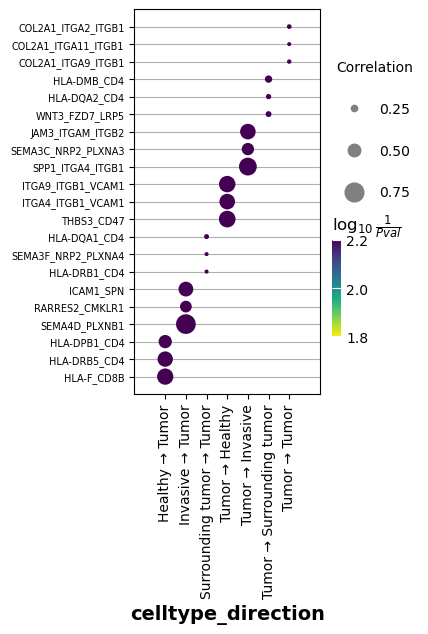

In [386]:
pl.dotplot(
    cop_sig_df_tumor,
    columns = 'qval',
    x = 'celltype_direction',
    y = 'lig_rec',
    xlabelsize=10,
    ylabelsize=7,
    figsize=(3,5),
    xticklabels_rot=90,
    show_ligrec_dir=False,
    top_term=3,
    cutoff=0.05,
    size=3,
)

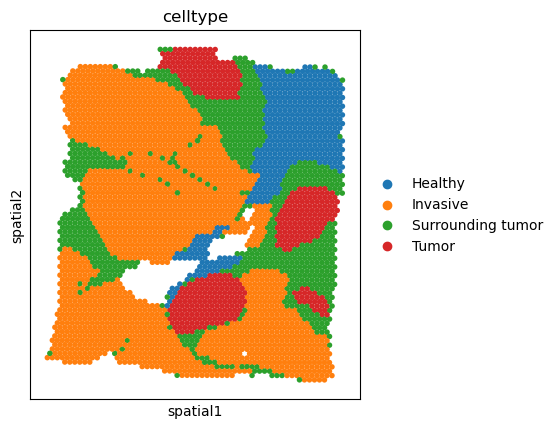

In [394]:
sc.pl.spatial(
    adata,
    img_key=None,
    color="celltype",
    #groups = ['Surrounding tumor', 'Tumor'],
    #groups=["Healthy", "Tumor"],
    spot_size=300,
)


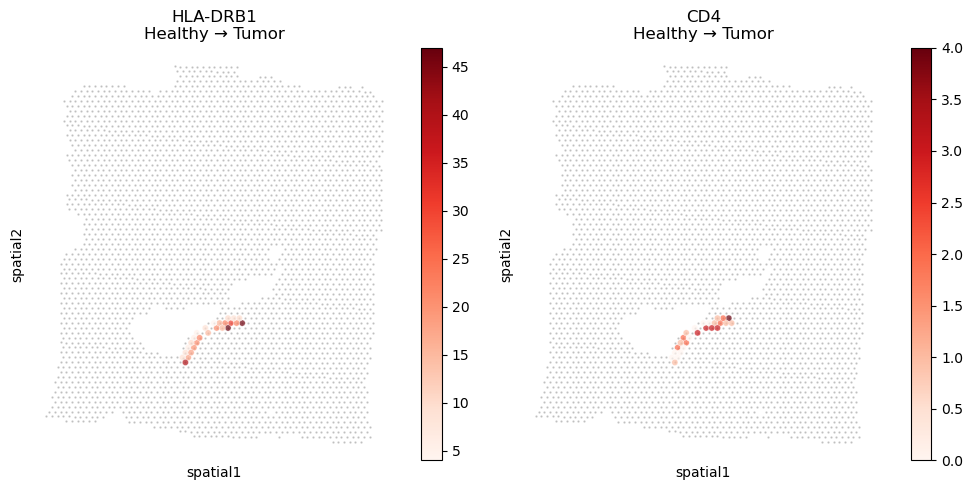

In [390]:
lig_rec_idx = 'ITGA'
int_type = 'Healthy=Tumor'
plot_raw_lr_boundary_expression(
    lig_rec_idx,
    int_type,
    loc_df,
    int_edges_new
)

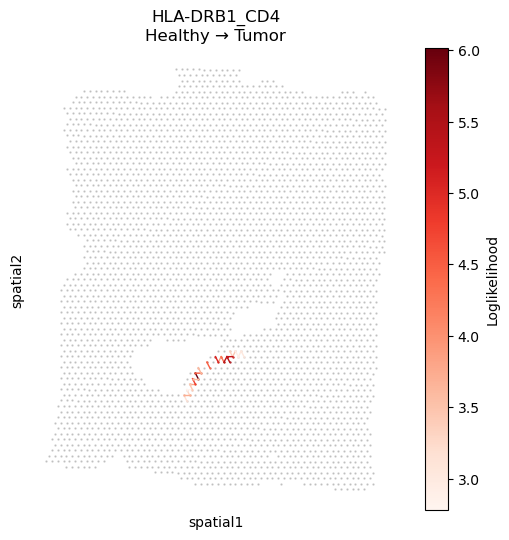

In [391]:
plot_lr_interaction_boundary_activity_color(
    df_lig_rec,
    lig_rec_idx,
    int_type,
    cop_df_dict,
    loc_df,
    int_edges_new,
    umi_sums,
    data_list_dict
)

In [ ]:
lig_rec_idx = 'HLA-F_'
plot_raw_lr_boundary_expression(
    lig_rec_idx,
    'Tumor=Surrounding tumor',
    loc_df,
    int_edges_new
)

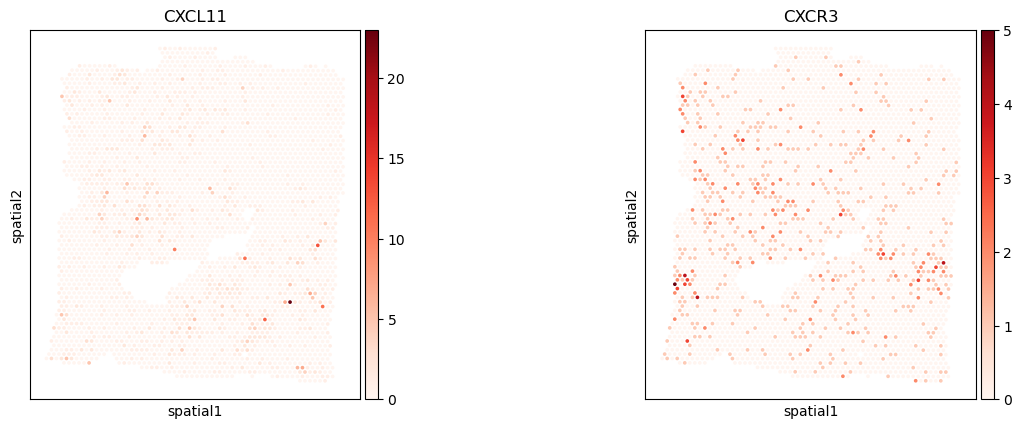

<Figure size 640x480 with 0 Axes>

In [378]:
sc.pl.spatial(adata, img_key=None, color = [
    'CXCL11',
    'CXCR3'],spot_size=200, cmap='Reds')
plt.tight_layout()

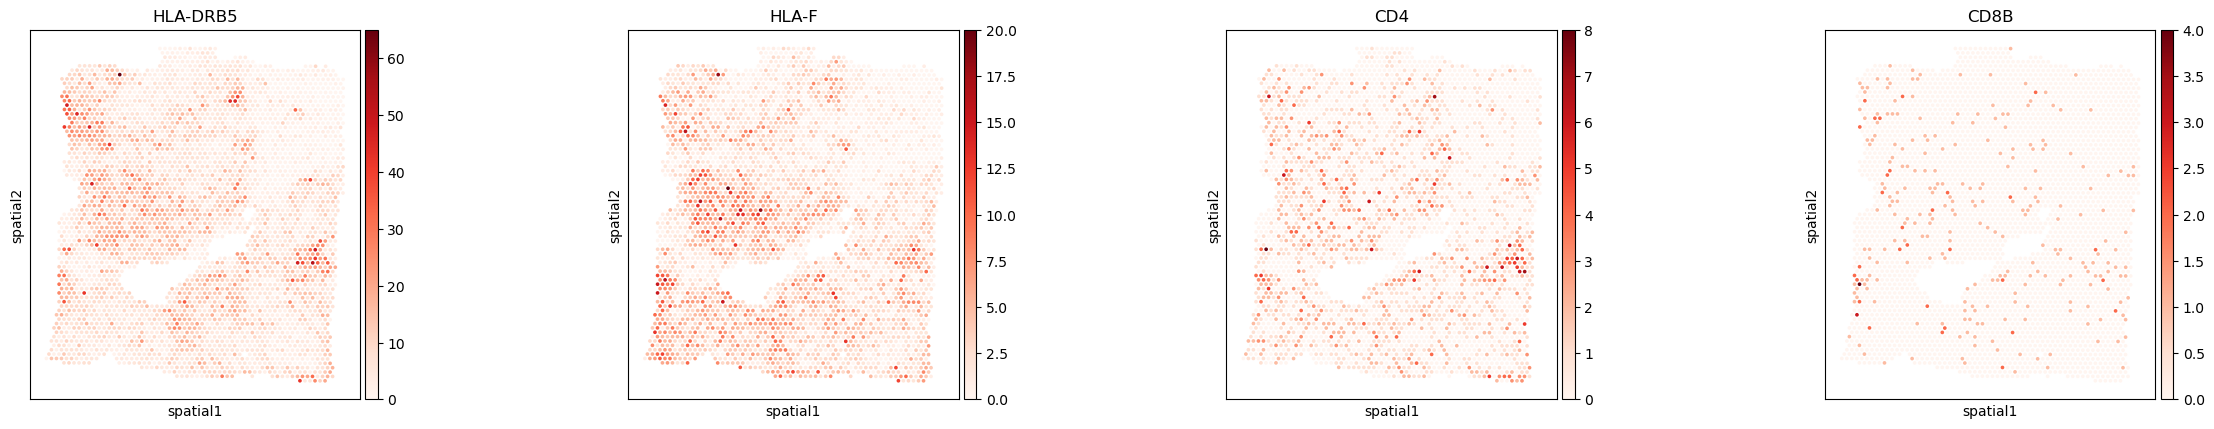

In [355]:
sc.pl.spatial(adata, img_key=None, color = ['HLA-DRB5',
                                           'HLA-F',
                                           'CD4',
                                            'CD8B'
                                          ],spot_size=200, cmap='Reds')

In [319]:
tmp = cop_sig_df_tumor.loc[cop_sig_df_tumor.gpair == 'Healthy=Tumor'].copy()

In [323]:
tmp.sort_values(['copula_coeff'],ascending=False).head()

copula_coeff      mu_x      mu_y copula_method             lig_rec  \
2       0.788281 -5.746382 -7.987291        copula          CD99_PILRA   
12      0.764097 -6.763035 -7.838975        copula  SEMA3C_NRP2_PLXNA2   
11      0.764097 -6.763035 -7.838975        copula  SEMA3C_NRP2_PLXNA4   
36      0.742782 -7.729692 -7.064218        copula        PDGFA_PDGFRB   
35      0.699676 -7.516971 -8.394900        copula          PGF_VEGFR1   

        pval      qval celltype_direction          gpair   source target  
2   0.003992  0.040918      Healthy=Tumor  Healthy=Tumor  Healthy  Tumor  
12  0.013972  0.063650      Healthy=Tumor  Healthy=Tumor  Healthy  Tumor  
11  0.009980  0.058455      Healthy=Tumor  Healthy=Tumor  Healthy  Tumor  
36  0.037924  0.097181      Healthy=Tumor  Healthy=Tumor  Healthy  Tumor  
35  0.081836  0.145882      Healthy=Tumor  Healthy=Tumor  Healthy  Tumor

In [326]:
tmp2 = cop_df_dict['Healthy=Tumor'].copy()

In [329]:
tmp2.loc['HLA-DRB5_CD4',:]

copula_coeff     0.615327
mu_x            -4.383647
mu_y            -6.804239
copula_method      copula
scc              0.339611
Name: HLA-DRB5_CD4, dtype: object